brief project Probability: https://drive.google.com/file/d/1yceHAwHZomEtqwpR8vuJTuPn1lYl5X_t/preview


# Introduction

Asuransi kesehatan dapat digunakan untuk menanggung biaya pengobatan, mulai dari biaya konsultasi dokter, biaya obat-obatan, biaya rawat inap, biaya operasi dan sebagainya. Untuk bisa menggunakan asuransi kesehatan, pengguna asuransi membayar premi (premiums) dalam periode waktu tertentu. Dengan asuransi kesehatan tersebut, pengguna asuransi dapat melakukan klaim pada jenis-jenis pelayanan kesehatan yang ada sesuai dengan ketentuan batas klaim setiap layanan dari asuransi kesehatan yang digunakan.

Dari sisi perusahaan asuransi, cara utama perusahaan asuransi memperoleh keuntungan adalah dengan memastikan premi yang diterima lebih besar dari klaim yang dibuat terhadap polis. Ini dikenal sebagai keuntungan penjaminan emisi. Perusahaan asuransi juga menghasilkan pendapatan investasi tambahan dengan berinvestasi pada premi yang diterima. Ini dikenal sebagai pendapatan investasi.

Dalam analisis yang akan dilakukan selanjutnya, kita akan melihat variable kesehatan dari pengguna asuransi seperti apa yang sangat berkaitan dengan besarnya klaim yang dilakukan. Kemudian, akan dicoba ditentukan besarnya premi yang akan ditanggung kepada  pengguna asuransi berdasarkan variabel kesehatan yang paling berpengaruh terhadap besarnya klaim.

Dataset yang digunakan berasal dari:
- https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health
- https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset


# Import Libraries & Read Dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read Dataset
df = pd.read_csv('insurance_data.csv')

# Data Understanding & Data Cleaning



## Data Understanding

In [4]:
# Lihat dataset
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [6]:
# Melihat data type dan missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [7]:
# Mencari jumlah pasien yang ada pada data
df['PatientID'].nunique()

1340

In [ ]:
# Mencari statistical summary dari data numerik secara umum
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


=> Melihat maksud dari setiap variabel
- index: index dari setiap row data.
- PatientID: id setiap pasien. Dalam data ini terdapat 1340 row dengan 1340 patienID yang unique. Sehingga, setiap row nya berasal dari patient yang berbeda.
- age: Usia dari setiap patientID.
- gender: Gender dari setiap patientID (Male / Female).
- bmi: Body mass index dari setiap patientID.
- bloodpressure: Nilai tekanan darah dari	orang yang diasuransikan / setiap patientID.
- diabetic: Apakah orang yang diasuransikan / setiap patientID menderita diabetes atau tidak. (Boolean)
- children: Jumlah anak yang ditanggung asuransi kesehatan / Jumlah tanggungan
- smoker: Apakah setiap patientID adalah perokok atau bukan. (Boolean)
- region: Area pemukiman orang yang diasuransikan / setiap patientID.
- claim: Jumlah klaim asuransi dari setiap patientID.



## Delete Unnecessary Columns

Menghapus kolom index dan patientID karena tidak digunakan dalam analisis selanjutnya

In [8]:
# Hapus kolom yang tidak digunakan
df_clean = df.drop([
     'index',
     'PatientID'],axis=1)
df_clean.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [9]:
# Melihat data type dan missing values
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1335 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1337 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


Masih terdapat missing values pada kolom age dan region, nantinya bisa di treat dengan imputasi

## Check Duplicate Value

In [ ]:
# Mengecek data duplicate
df_clean[df_clean.duplicated(keep=False)]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim


Tidak ada data yang duplicate

## Check Outlier

In [ ]:
# Menentukan kolom-kolom yang memiliki tipe data numerik
num_dtypes = ['int16', 'int32', 'int64', 'float', 'float16', 'float32', 'float64']

num_df = df_clean.select_dtypes(include = num_dtypes)
numericals = num_df.columns
print(numericals)

Index(['age', 'bmi', 'bloodpressure', 'children', 'claim'], dtype='object')


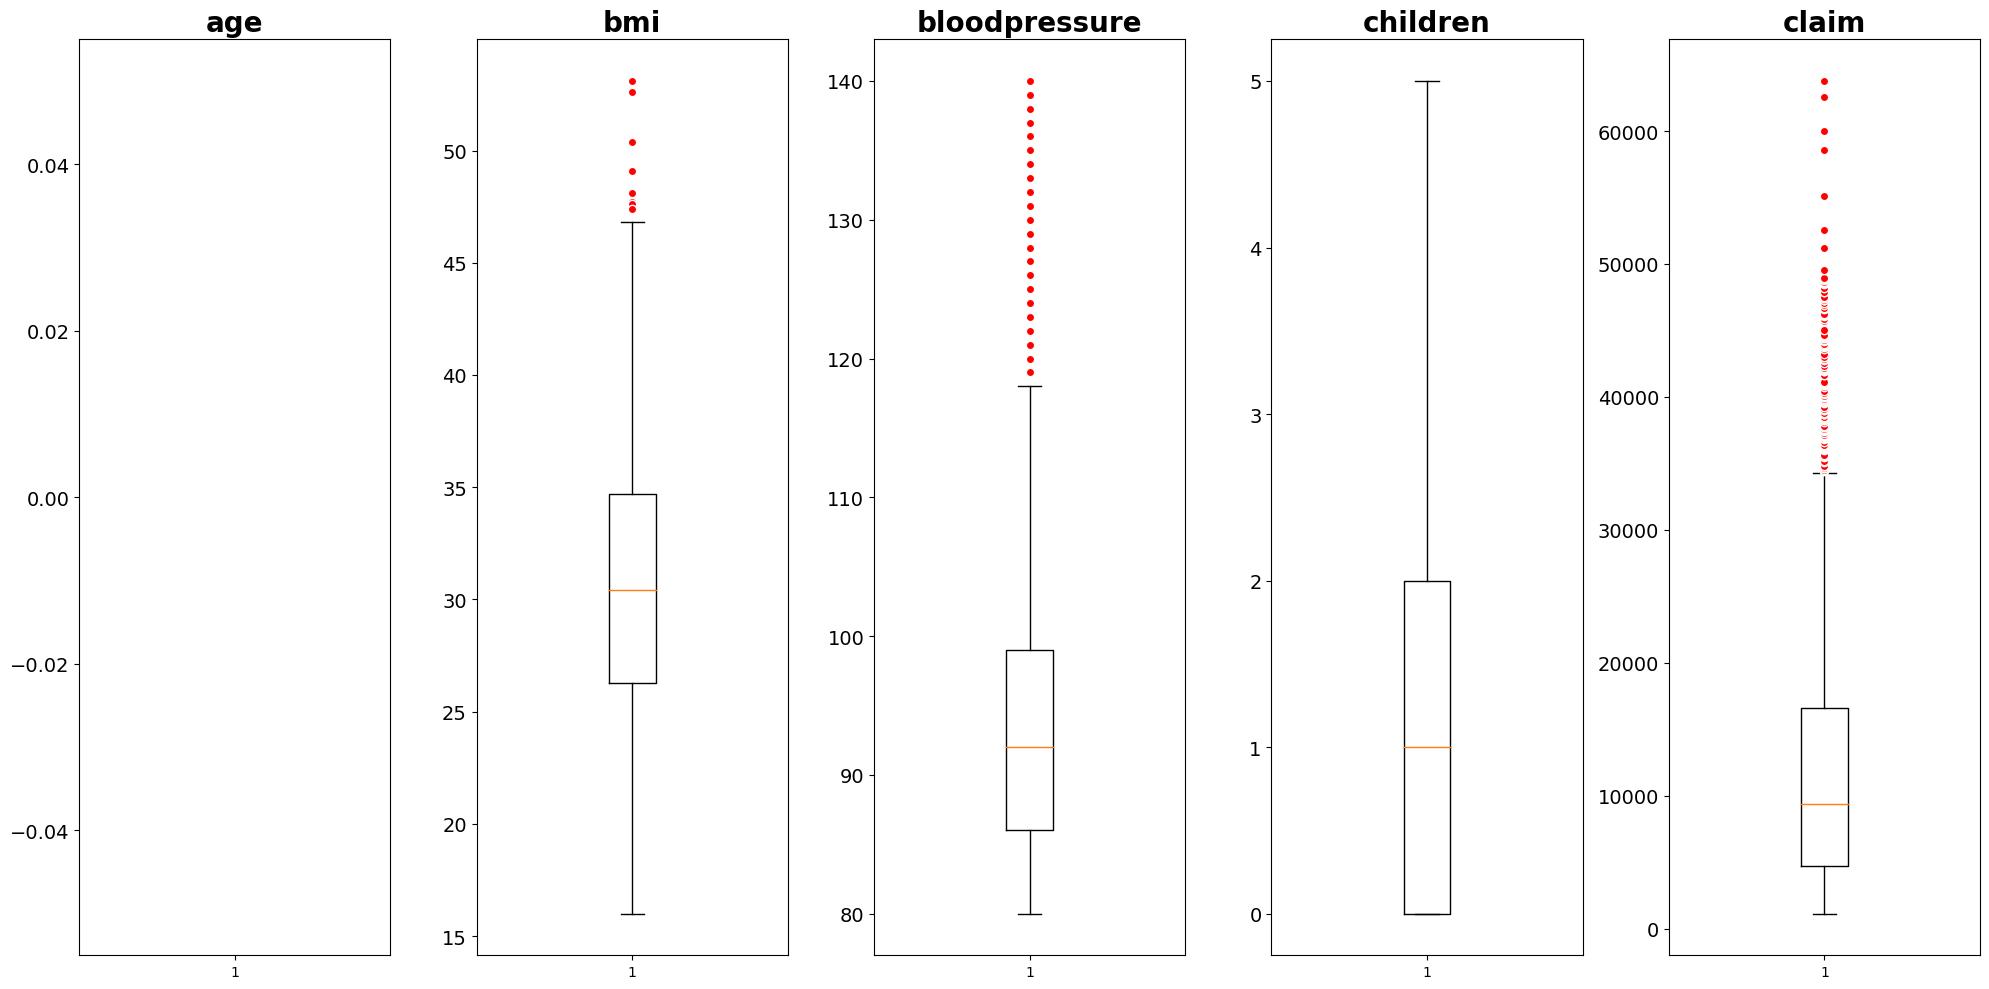

In [ ]:
# Creating subplot of boxplot of each column with its own scale
# Melihat outlier
try:
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(numericals), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(df_clean[numericals].iloc[:,i], flierprops=red_circle)
      ax.set_title(df_clean[numericals].columns[i], fontsize=20, fontweight='bold')
      ax.tick_params(axis='y', labelsize=14)

  plt.tight_layout()
except:
  print("Error")

<Axes: >

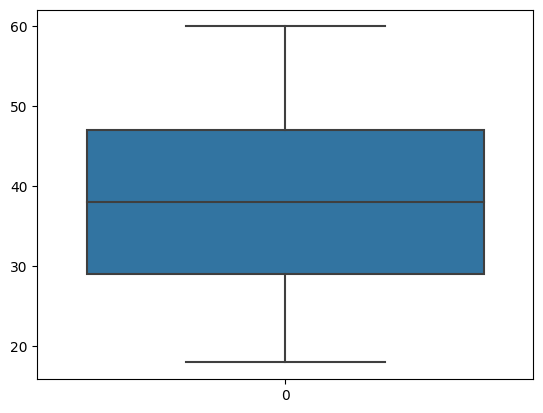

In [ ]:
# Melihat boxplot kolom age
sns.boxplot(df_clean['age'])

Meskipun terdapat data outlier, bersasarkan dari grafik boxplot di atas, nilai yang keluar masih bisa dikatakan masuk akal.
- Untuk bmi, masih masuk akal ada yang memiliki BMI lebih dari 50, artinya orang tersebut termasuk kategori morbidly obese
- Untuk blood preassure, sampai 140 itu hal yang bisa saja terjadi jika orang tersebut memiliki riwayat hipertensi
- Claim yang mencapai $60,000 masih wajar, dengan rata-rata biaya kesehatan di US per orang bisa mencapai \$12,900

Sehingga, data outlier yang ada ini tetap dibiarkan apa adanya.

## Check Skewness dan Data Distribution

In [ ]:
# Menentukan Kolom Numerik
col_numerical = ['age', 'bmi', 'bloodpressure', 'children', 'claim']

In [ ]:
# Chek skewness
import scipy.stats
for i in range(len(col_numerical)):
    skewness_score = scipy.stats.skew(df_clean[col_numerical[i]])
    if skewness_score <= 1 and skewness_score>=-1:
        print(f'Skewness score kolom {col_numerical[i]} : {scipy.stats.skew(df_clean[col_numerical[i]])}\n(Maka berdistribusi normal)')
    elif skewness_score >1:
        print(f'Skewness score kolom {col_numerical[i]} : {scipy.stats.skew(df_clean[col_numerical[i]])}\n(Maka skew positif)')
    else:
        print(f'Skewness score kolom {col_numerical[i]} : {scipy.stats.skew(df_clean[col_numerical[i]])}\n(Maka skew negatif)')

Skewness score kolom age : nan
(Maka skew negatif)
Skewness score kolom bmi : 0.28565223220233654
(Maka berdistribusi normal)
Skewness score kolom bloodpressure : 1.481873020957702
(Maka skew positif)
Skewness score kolom children : 0.9392462122488795
(Maka berdistribusi normal)
Skewness score kolom claim : 1.5150484717816854
(Maka skew positif)


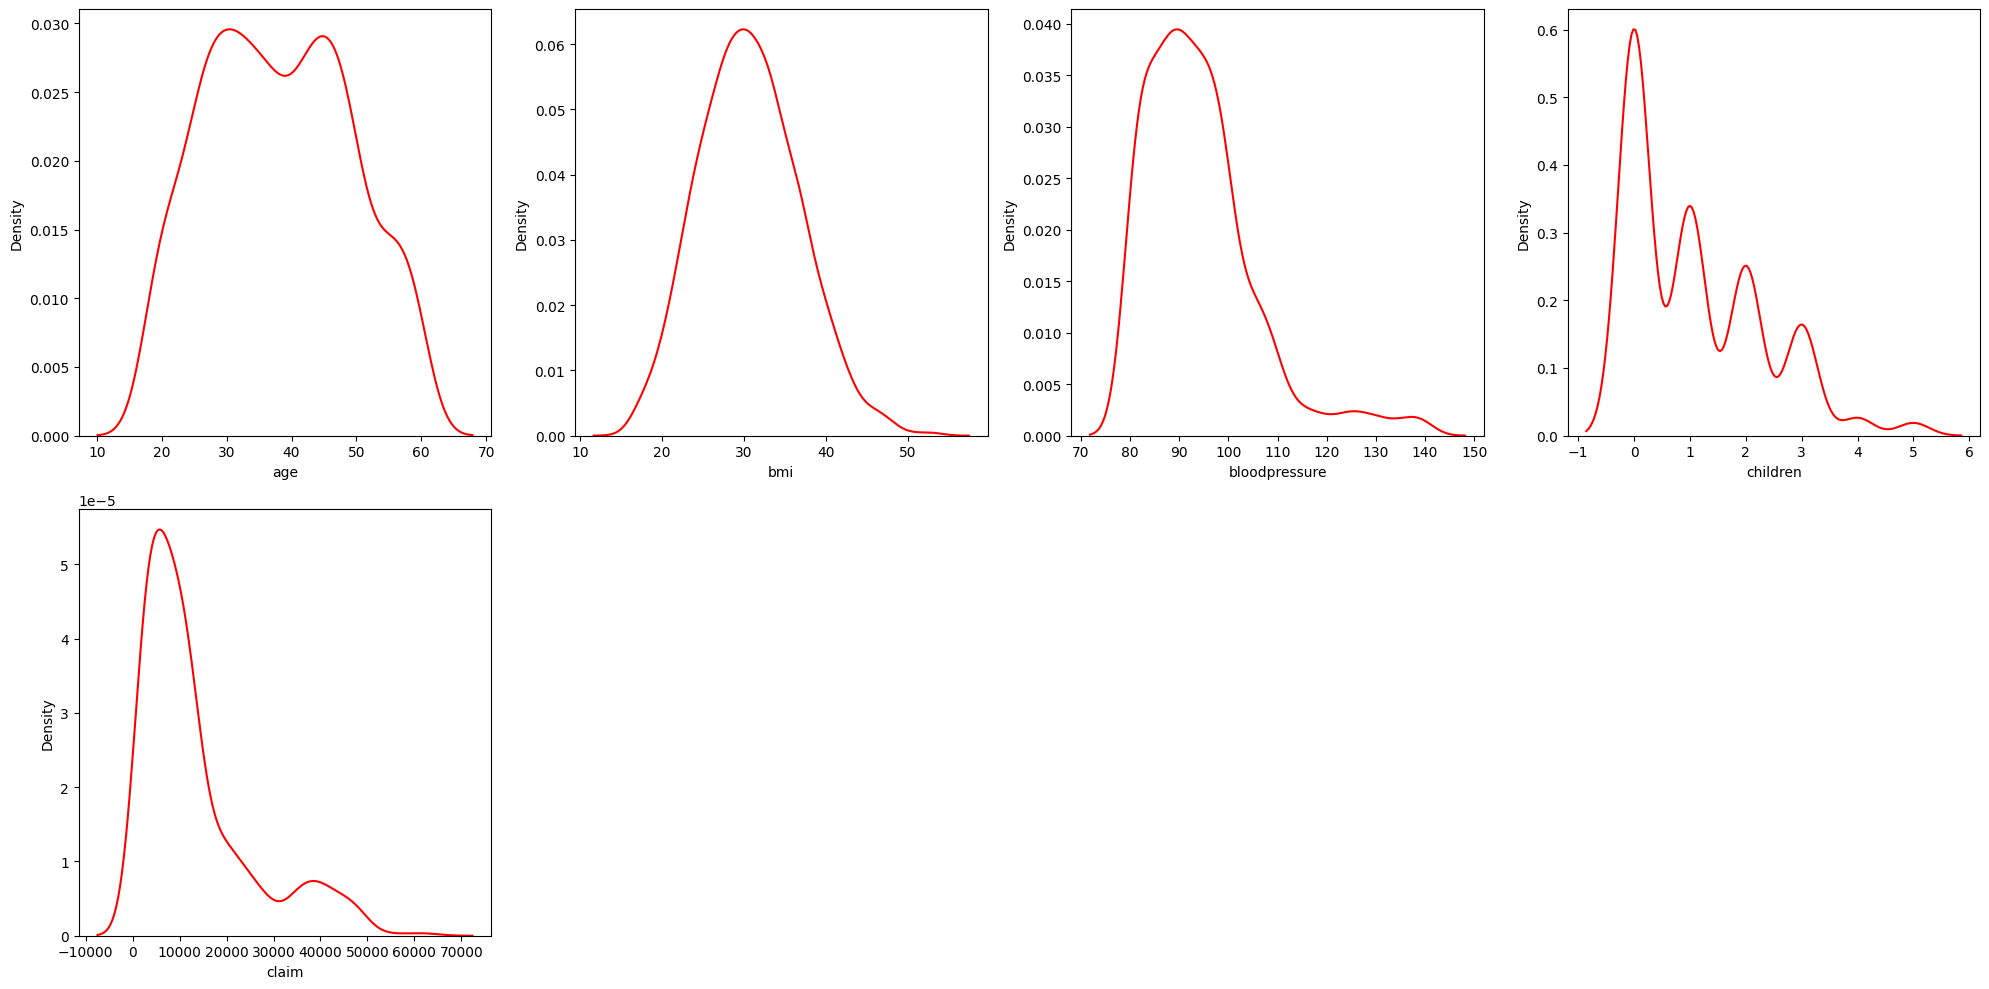

In [ ]:
# Melihat distribusi kolom numerik
features_num = numericals

plt.figure(figsize=(20,10))

for i in range(0, len(numericals)):
  plt.subplot(2, 4, i+1) # 2x4 = 8 > len(numericals) = 7
  sns.kdeplot(x=df_clean[features_num[i]], color = 'red')
  plt.xlabel(features_num[i])
  plt.tight_layout()


## Handling Missing Values

In [ ]:
# Mengecek missing values kolom age
df_clean[df_clean['age'].isnull()]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,NaN,male,37.3,86,Yes,0,No,northwest,1141.45


In [ ]:
# Mengecek missing values pada kolom region
df_clean[df_clean['region'].isnull()]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
13,32.0,male,27.6,100,No,0,No,NaN,1252.41
14,40.0,male,28.7,81,Yes,0,No,NaN,1253.94
15,32.0,male,30.4,86,Yes,0,No,NaN,1256.30


Untuk data cleaning:
- pada kolom region, karena tipe datanya kategorikal, imputasi dengan modus
- pada kolom age, meskipun tipe datanya numerikal, distribusi nya adalah bimodal. Jika pakai mean/median, maka tidak akan representatif. Sehingga imputasi dengan menggunakan modus.

In [10]:
# impute 'age', 'region' dengan modus
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].mode()[0])
df_clean['region'] = df_clean['region'].fillna(df_clean['region'].mode()[0])

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1340 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


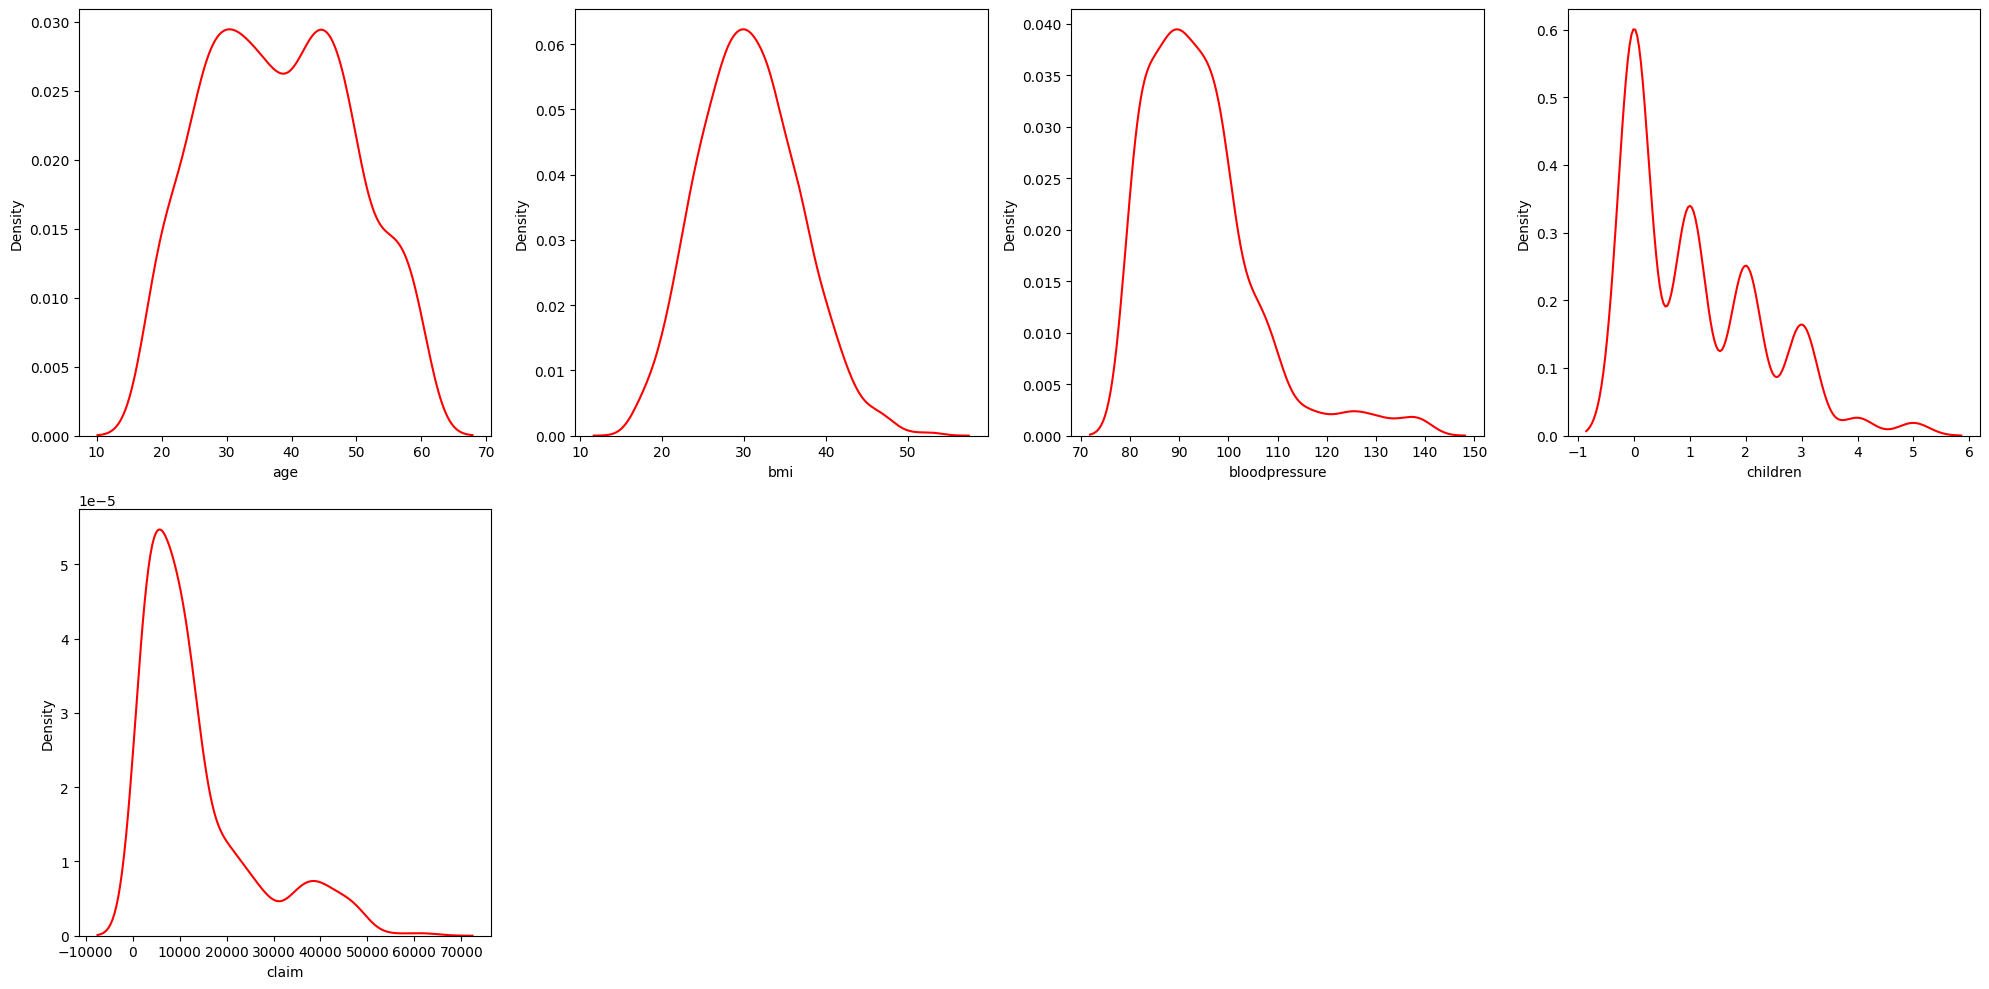

In [ ]:
# Melihat distribusi kolom numerik
# setelah imputasi

features_num = numericals

plt.figure(figsize=(20,10))

for i in range(0, len(numericals)):
  plt.subplot(2, 4, i+1) # 2x4 = 8 > len(numericals) = 7
  sns.kdeplot(x=df_clean[features_num[i]], color = 'red')
  plt.xlabel(features_num[i])
  plt.tight_layout()

# Analisis Deskriptif Statistik


## Goals dan Objective

Goals:
- Mengetahui statistika deskriptif dari pengguna asuransi

Objective:

Analisis Statistika Deskriptif pada 1 Variable
- Mengetahui rata-rata dan standar deviasi umur, bmi, bloodpreassure dan claim para peserta asuransi
- Mengetahui modus dari children, diabetic, smoker, gender dan region


Analisis Statistika Deskriptif pada 2 Variable
- Perbandingan rata-rata age dari user terhadap region, diabetes dan merokok
- Perbandingan rata-rata bmi dari user terhadap region, diabetes dan merokok
- Perbandingan median bloodpreassure dari user terhadap region, diabetes dan merokok
- Perbandingan median claim dari user terhadap region, diabetes dan merokok
- Perbandingan rata-rata claim dari user pada setiap class bmi
- Perbandingan rata-rata claim dari user dengan penderita high blood preassure, low blood preassure dan normal


Analisis Statistika Deskriptif pada Multi Variable
- Perbandingan total user dari setiap region yang merokok dan rata-rata claim nya
- Rata-rata tagihan kesehatan perokok dengan BMI diatas 25



In [ ]:
# Melihat 5 data dari dataset secara acak
df_clean.sample(5)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
118,58.0,female,30.1,81,Yes,0,No,southeast,2203.47
372,34.0,female,29.8,100,Yes,2,No,southwest,5152.13
146,47.0,female,34.0,84,No,0,No,southeast,2473.33
1028,33.0,male,29.7,102,Yes,2,No,northwest,18157.88
37,34.0,male,25.6,83,No,0,No,northwest,1632.56


## Analisis Statistika Deskriptif pada 1 Variable

### Mengetahui rata-rata dan standar deviasi umur, bmi, bloodpreassure dan claim para peserta asuransi

In [ ]:
# Deskripsi Statistik kolom numerik
df_clean.describe()

,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,38.097015,30.668955,94.157463,1.093284,13252.745642
std,11.086239,6.106735,11.434712,1.205334,12109.609288
min,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,47.000000,34.700000,99.000000,2.000000,16604.305000
max,60.000000,53.100000,140.000000,5.000000,63770.430000


Result:
- Rata-rata umur dari pengguna asuransi adalah 38.09 ~ 38.8 Tahun. Mayoritas pengguna asuransi berada di usia 27 s.d 49 tahun. Minimal usia pengguna asuransi berdasarkan data ini adalah 18 tahun dan maksimal adalah 60 tahun.

- Rata-rata BMI dari pengguna asuransi adalah 30.6 yang berarti obesitas. Mayoritas pengguna asuransi berada di antara 24.6 s.d 36.8 yang berarti berada di antara Healthy weight range dan obesitas.

|Klasifikasi | BMI|
| --- | --- |
|Underweight | < 18,5|
|Healthy Weight Range | 18,5 - 24.9 |
|Overweight| 25 - 29,9 |
|Obesitas | ≥ 30 |

Sumber: https://www.cdc.gov/obesity/basics/adult-defining.html


- Rata-rata Bloodpreassure dari pengguna asuransi adalah 94.15 mmHg yang berarti berada dalam kategori Normal. Mayoritas pengguna asuransi memiliki tekanan darah sebesar 82.7 mmHg s.d 105.6 mmHg yang berarti berada di kategori Normal.

Sumber: https://www.cdc.gov/bloodpressure/facts.htm


- Rata-rata claim yang dilakukan oleh pengguna asuransi adalah \$13,252.74
Mayoritas pengguna asuransi melakukan claim diantara \$1,143.13 - \$25,362.35


### Mengetahui modus dari children, diabetic, smoker, gender dan region

In [ ]:
# Deskripsi Statistik kolom kategorikal

# Mencari statistika deskriptif
df_desc_object = df_clean.describe(include='object')
# Melakukan transpose data
df_desc_object = df_desc_object.T
# Membuat kolom baru, yaitu percentage_of_mode
df_desc_object['percentage_of_mode'] = (df_desc_object['freq'] /
                                        df_desc_object['count'] ) * 100

df_desc_object

,count,unique,top,freq,percentage_of_mode
gender,1340,2,male,678,50.597015
diabetic,1340,2,No,698,52.089552
smoker,1340,2,No,1066,79.552239
region,1340,4,southeast,446,33.283582


Result:
- Pengguna asuransi mayoritas adalah Pria, dengan 50,59% nya memiliki gender Male.
- Pengguna asuransi mayoritas Tidak terkena diabetes, dengan persentase sebesar 52.1%.
- Pengguna asuransi mayoritas Tidak merokok, dengan persentase sebesar 79,5%.
- Pengguna asuransi mayoritas berasal dari Southeast, dengan persentase sebesar 33.29%.

## Analisis Statistika Deskriptif pada 2 Variable



In [ ]:
def find_mean_std(*by, agg_kol, agg):
  df_result = df_clean.groupby(by).agg({agg_kol:agg})
  return df_result

### Perbandingan rata-rata age dari user terhadap region, diabetes dan merokok


In [ ]:
# Membuat groupby region dengan aggregate average age

df_region_avg_age = df_clean.groupby(['region']).agg({'age':['mean','std']})
df_region_avg_age

age           
                mean        std
region                         
northeast  38.064935  11.587104
northwest  37.767908  10.954477
southeast  38.562780  10.949500
southwest  37.824841  11.079060

In [ ]:
# Membuat groupby diabetes dengan aggregate average age

df_diabet_avg_age = df_clean.groupby(['diabetic']).agg({'age':['mean','std']})
df_diabet_avg_age

age           
               mean        std
diabetic                      
No        38.369628  11.213504
Yes       37.800623  10.947220

In [ ]:
# Membuat groupby merokok dengan aggregate average age

df_smoke_avg_age = df_clean.groupby(['smoker']).agg({'age':['mean','std']})
df_smoke_avg_age

age           
             mean        std
smoker                      
No      38.280488  11.050424
Yes     37.383212  11.216282

Result:
- Rata-rata umur dari setiap region, diabetes atau tidak dan merokok atau tidak ada di sekitar 37 sampai 39 tahun. Mayoritas pengguna asuransi berada di usia 27 - 50 tahun.


### Perbandingan rata-rata bmi dari user terhadap region, diabetes dan merokok


In [ ]:
# Membuat groupby region dengan aggregate average bmi

df_region_avg_bmi = df_clean.groupby(['region']).agg({'bmi':['mean','std']})
df_region_avg_bmi

bmi          
                mean       std
region                        
northeast  29.363203  5.967782
northwest  29.267335  5.434423
southeast  32.365695  6.555438
southwest  30.777389  5.645261

In [ ]:
# Membuat groupby diabetes dengan aggregate average bmi

df_diabet_avg_bmi = df_clean.groupby(['diabetic']).agg({'bmi':['mean','std']})
df_diabet_avg_bmi

bmi          
               mean       std
diabetic                     
No        30.885387  6.097506
Yes       30.433645  6.112805

In [ ]:
# Membuat groupby merokok dengan aggregate average bmi

df_smoke_avg_bmi = df_clean.groupby(['smoker']).agg({'bmi':['mean','std']})
df_smoke_avg_bmi

bmi          
             mean       std
smoker                     
No      30.657598  6.053472
Yes     30.713139  6.320840

Result:
- Rata-rata BMI dari region Southeast paling tinggi yaitu 32.36
- Rata-rata BMI dari pengguna asuransi yang terkena diabetes dan tidak terkena diabetes hampir mirip di sekitar 30. Namun, rata-rata BMI yang tidak terkena diabetes lebih tinggi dengan nilai 30.88
- Rata-rata BMI dari pengguna asuransi yang merokok dan tidak merokok hampir mirip di sekitar 30. Namun, rata-rata BMI yang merokok lebih tinggi dengan nilai 30.71


### Perbandingan median bloodpreassure dari user terhadap region, diabetes dan merokok


In [ ]:
# Membuat groupby region dengan aggregate median bp

df_region_median_bp = df_clean.groupby(['region']).agg({'bloodpressure':'median'})
df_region_median_bp

,bloodpressure
region,
northeast,94.0
northwest,91.0
southeast,93.0
southwest,92.0


In [ ]:
# Membuat groupby diabetes  dengan aggregate median bp

df_diabet_median_bp = df_clean.groupby(['diabetic']).agg({'bloodpressure':'median'})
df_diabet_median_bp

,bloodpressure
diabetic,
No,93.0
Yes,92.0


In [ ]:
# Membuat groupby merokok  dengan aggregate median bp

df_smoker_median_bp = df_clean.groupby(['smoker']).agg({'bloodpressure':'median'})
df_smoker_median_bp

,bloodpressure
smoker,
No,91.0
Yes,101.0


Result:
- Median bloodpreassure dari Region Northeast paling tinggi, yaitu 94
- Median bloodpreassure pada pengguna asuransi yang terkena diabetes lebih rendah sedikit yaitu 92, daripada yang tidak terkena yaitu 93
- Median bloodpreassure pada pengguna asuransi yang merokok lebih tinggi yaitu 101, daripada yang tidak merokok yaitu 91

### Perbandingan median, mean, var dan std claim dari user terhadap region, diabetes dan merokok


In [ ]:
# Membuat groupby region dengan aggregate claim

df_region_agg_claim = df_clean.groupby(['region']).agg(Mean=('claim', np.mean),
                                                          Median=('claim', np.median),
                                                          var=('claim', np.var),
                                                          std=('claim', np.std))
df_region_agg_claim

,Mean,Median,var,std
region,,,,
northeast,16889.044719,13129.600,1.340524e+08,11578.101476
northwest,11672.088453,8116.270,1.216994e+08,11031.744657
southeast,12979.121502,7335.390,1.733972e+08,13168.035426
southwest,12723.129841,9123.185,1.340621e+08,11578.518764


In [ ]:
# Membuat groupby diabetic dengan aggregate claim

df_diabetic_agg_claim = df_clean.groupby(['diabetic']).agg(Mean=('claim', np.mean),
                                                          Median=('claim', np.median),
                                                          var=('claim', np.var),
                                                          std=('claim', np.std))
df_diabetic_agg_claim

,Mean,Median,var,std
diabetic,,,,
No,13354.031991,9274.18,1.506849e+08,12275.376160
Yes,13142.624346,9421.97,1.424527e+08,11935.356153


In [ ]:
# Membuat groupby smoker dengan aggregate claim

df_smoker_agg_claim = df_clean.groupby(['smoker']).agg(Mean=('claim', np.mean),
                                                          Median=('claim', np.median),
                                                          var=('claim', np.var),
                                                          std=('claim', np.std))
df_smoker_agg_claim

,Mean,Median,var,std
smoker,,,,
No,8421.121576,7341.415,3.595014e+07,5995.843246
Yes,32050.231971,34456.350,1.332073e+08,11541.547338


Result:
- Region Northeast melakukan claim tertinggi secara volume, dengan rata-rata claim \$13,129.6
- Penderita diabetes melakukan claim lebih tinggi dengan rata-rata claim \$9,421.97
- Pengguna Asuransi yang merokok melakukan claim lebih tinggi dengan rata-rata claim \$34,456.350

### Perbandingan rata-rata claim dari user pada setiap class bmi


|Klasifikasi | BMI|
| --- | --- |
|Underweight | < 18,5|
|Healthy Weight Range | 18,5 - 24.9 |
|Overweight| 25 - 29,9 |
|Obesitas | ≥ 30 |

In [ ]:
# Menyalin df_clean untuk diedit selanjutnya
df_bmi_claim = df_clean.copy()
# create function classifier to classify bmi
def classifier_bmi(row):
    if row["bmi"] >= 30:
        return "Obesitas"
    elif row["bmi"] >= 25:
        return "Overweight"
    elif row["bmi"] >= 18.5:
        return "Normal"
    else:
        return "Underweight"

# Membuat kolom baru, bmi_class
df_bmi_claim["bmi_class"] = df_bmi_claim.apply(classifier_bmi, axis=1)

In [ ]:
# Look at the result
df_bmi_claim.sample(5)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_class
359,46.0,female,36.6,84,Yes,2,No,southeast,4949.76,Obesitas
1025,59.0,female,31.8,103,Yes,0,No,southeast,17929.30,Obesitas
796,38.0,male,23.3,98,No,0,No,southwest,11345.52,Normal
378,23.0,male,30.8,89,Yes,3,No,southwest,5253.52,Obesitas
1181,32.0,male,28.6,132,No,0,No,northeast,30260.00,Overweight


In [ ]:
# Membuat groupby bmi_class dengan aggregate average claim

df_bmi_class = df_bmi_claim.groupby(['bmi_class']).agg({'claim':'mean'})
df_bmi_class.sort_values(by='claim', ascending=False)

,claim
bmi_class,
Obesitas,15531.992599
Overweight,11000.079306
Normal,10340.598744
Underweight,8852.201500


Result:
- Rata-rata claim pengguna asuransi yang memiliki BMI termasuk obesitas tertinggi, diikuti dengan overweight, lalu normal dan underweight.

### Perbandingan rata-rata claim dari user dengan penderita high blood preassure, low blood preassure dan normal

In [ ]:
# Menyalin df_clean untuk diedit selanjutnya
df_bp_claim = df_clean.copy()
# create function classifier to classify blood preassure
def classifier_bp(row):
    if row["bloodpressure"] >= 140:
        return "Hipertensi"
    else:
        return "Normal"

# Membuat kolom baru, bp_class
df_bp_claim["bp_class"] = df_bp_claim.apply(classifier_bp, axis=1)

In [ ]:
df_bp_claim.sample(5)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bp_class
676,40.0,female,27.3,100,No,1,No,northeast,9447.25,Normal
717,27.0,male,36.1,104,Yes,1,No,southwest,10085.85,Normal
718,34.0,male,25.8,100,Yes,5,No,southwest,10096.97,Normal
280,25.0,female,27.9,88,Yes,0,No,southeast,4137.52,Normal
505,34.0,female,26.2,88,Yes,1,No,southeast,7046.72,Normal


In [ ]:
df_bp_claim['bp_class'].value_counts()

Normal        1335
Hipertensi       5
Name: bp_class, dtype: int64

In [ ]:
# Membuat groupby bp_class dengan aggregate average claim

df_bp_class = df_bp_claim.groupby(['bp_class']).agg({'claim':'mean'})
df_bp_class.sort_values(by='claim', ascending=False)

,claim
bp_class,
Hipertensi,38323.4960
Normal,13158.8477


Result:
- Rata-rata claim pengguna asuransi yang memiliki gejala hipertensi lebih tinggi daripada yang normal. Pada penderita gejala hipertensi rata-rata claim nya adalah \$38,323.5 dan pada pengguna asuransi yang Normal adalah \$13,158.8

## Analisis Statistika Deskriptif pada Multi Variabel

### Perbandingan total user dari setiap region yang merokok dan rata-rata claim nya

In [ ]:
# Membuat tabel yang diperlukan
df_region_smoke = df_clean.groupby('region').agg({'smoker':'count',
                                                  'claim':'mean'})
df_region_smoke

,smoker,claim
region,,
northeast,231,16889.044719
northwest,349,11672.088453
southeast,446,12979.121502
southwest,314,12723.129841


Result:
- Meskipun region Norhteast memiliki claim tertinggi, tapi total pengguna yang merokok merupakan yang paling rendah.

### Rata-rata tagihan kesehatan perokok dengan BMI diatas 25

In [ ]:
# Lihat kembali data yang memiliki bmi_class
df_bmi_claim.sample(5)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_class
984,24.0,male,33.7,101,No,3,No,southeast,15161.53,Obesitas
891,34.0,male,37.0,92,Yes,0,No,northeast,12741.17,Obesitas
241,23.0,male,32.7,82,Yes,3,No,southwest,3591.48,Obesitas
612,28.0,female,24.3,93,Yes,0,No,northeast,8534.67,Normal
515,27.0,female,28.3,88,No,1,No,northwest,7153.55,Overweight


In [ ]:
# bmi di atas 25 itu berarti yang memiliki bmi_class
# obesitas dan overweight
# dalam kasus ini, maka keduanya dijadikan satu, yaitu obes
df_bmi_25 = df_bmi_claim.replace(['Overweight', 'Obesitas'],
                                 ['Obes', 'Obes'])
df_bmi_25.sample(5)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_class
1130,39.0,female,27.6,104,Yes,1,Yes,southwest,24520.26,Obes
1200,40.0,male,32.7,98,No,0,Yes,southwest,34472.84,Obes
16,35.0,male,34.1,90,No,0,No,southwest,1261.44,Obes
996,29.0,female,21.9,92,Yes,0,Yes,northeast,16115.30,Normal
827,34.0,male,26.4,105,Yes,0,No,southeast,11743.30,Obes


In [ ]:
# rata-rata tagihan perokok dengan bmi diatas 25
df_bmi_25.groupby(['bmi_class',
                   'smoker']).agg({'claim':'mean'}).sort_values(by='claim',
                                                                ascending=False)

,,claim
bmi_class,smoker,
Obes,Yes,35116.909909
Normal,Yes,19942.223200
Underweight,Yes,18809.826000
Obes,No,8639.041390
Normal,No,7565.562775
Underweight,No,5532.993333


Result:
-  Lebih tinggi claim asuransi orang yang merokok dengan BMI diatas 25 (obes) daripada yang tidak merokok dan BMI diatas 25 (obes)

## Menjawab Pertanyaan Soal

1. Berapa rata-rata umur pada data tersebut:
  - Rata-rata umur pengguna asuransi adalah 38.09 tahun

2. Berapa rata-rata nilai BMI yang merokok:
  - Rata-rata BMI dari smoker adalah 30.713139

<!-- 3. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

4. Apakah rata-rata umur perempuan dan laki-laki yang merokok sama? -->

5. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non perokok?
  - Baik itu secara median / mean, user yang merokok memiliki claim asuransi lebih besar
  - Median claim asuransi perokok sebesar \$34,456.350

6. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok dengan BMI diatas 25 atau atau non perokok dengan BMI diatas 25?
  - Lebih tinggi claim asuransi orang yang merokok dengan BMI diatas 25 (obes) daripada yang tidak merokok dan BMI diatas 25 (obes)

7. BMI mana yang lebih tinggi, seorang perokok atau non perokok?
- BMI orang yang tidak merokok adalah 30.657598
- BMI orang yang merokok adalah 30.713139
- Sehingga BMI orang yang merokok lebih tinggi dari yang tidak.

# Analisis Peluang pada Variable Diskrit

## Goals & Objective

### Goals:
- Mencari peluang kondisi tertentu terhadap tagihan kesehatan
(Mengidentifikasi peluang kondisi tertentu yang berpotensi memiliki besaran variabel tertentu)

### Objective:

#### Proporsi
- Proporsi data di gender (Male & Female)
- Proporsi data di setiap diabetic (Non & Yes)
- Proporsi data di setiap smoker (Non & Yes)
- Proporsi data di setiap	children (Non & Yes)
- Proporsi data di setiap region


#### Perbandingan Claim terhadap variabel lain
- (Diskrit)
  - Perbandingan Total dan Average Claim terhadap  gender
  - Perbandingan Total dan Average Claim terhadap diabetic
  - Perbandingan Total dan Average Claim terhadap	children
  - Perbandingan Total dan Average Claim terhadap smoker
  - Perbandingan Total dan Average Claim terhadap	region
- (Continous)
  - Perbandingan Total dan Average Claim terhadap age
  - Perbandingan Total dan Average Claim terhadap bmi
  - Perbandingan Total dan Average Claim terhadap bloodpressure


#### PMF (Probability mass Function)
=> Ini tagihan nya di count bukan sum
- Distribusi Peluang Tagihan di setiap region
- Distribusi Peluang Tagihan di gender (Male & Female)
- Distribusi Peluang Tagihan di setiap diabetic (Non & Yes)
- Distribusi Peluang Tagihan di setiap	children (Non & Yes)
- Distribusi Peluang Tagihan di setiap smoker (Non & Yes)
notes: Nanti state dia bentuk pmf nya apa


Kombinasi pasangan berisi 2 data dari 5 data:
Kombinasi = 5C2 = 5! / 2! * (5-2)! = 5! / (2! * 3!) = 10 kombinasi


#### Join PMF dan marginal PMF (Probability & Conditional Probability) & Independence RV
- Peluang Gender terhadap Region
- Peluang Gender terhadap diabetic
- Peluang Gender terhadap children
- Peluang Gender terhadap smoker
- Peluang diabetic terhadap Region
- Peluang diabetic terhadap children
- Peluang diabetic terhadap smoker
- Peluang smoker terhadap Region
- Peluang smoker terhadap children
- Peluang children terhadap Region

- Peluang claim (>= median or < median) terhadap Region. Cari apakah kedua hal tsb independen atau tidak.
- Peluang claim (>= median or < median) terhadap diabetic.Cari apakah kedua hal tsb independen atau tidak.
- Peluang claim (>= median or < median) terhadap children. Cari apakah kedua hal tsb independen atau tidak.
- Peluang claim (>= median or < median) terhadap smoker. Cari apakah kedua hal tsb independen atau tidak.
- Peluang claim (>= median or < median) terhadap gender. Cari apakah kedua hal tsb independen atau tidak.


#### Expectation - Mean & Variance
=> Bikin dulu claim (>= median or < median)
=> Pertanyaan: Berapa ekspektasi anak yang dimiliki jika dalam asuransi hanya mengcover maksimal 3 anak?


<!-- --
Tinggal bayes rule yg belum -->



## Proporsi Kolom Numerik

In [ ]:
# Proporsi data di gender (Male & Female)
# Membuat tabel yang diperlukan
df_gender_proportion = df_clean.groupby('gender').agg(
                                              {'claim': 'count'})
df_gender_proportion.reset_index(inplace=True)
df_gender_proportion

,gender,claim
0,female,662
1,male,678


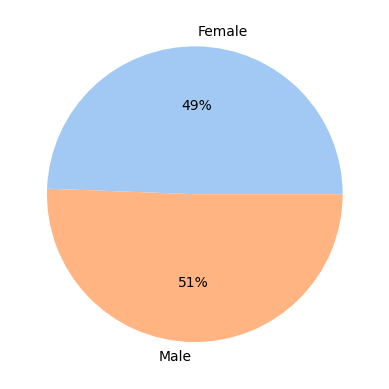

In [ ]:
keys = ['Female', 'Male']

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
plt.pie(df_gender_proportion['claim'], labels=keys, colors=palette_color,
        autopct='%.0f%%')

# displaying chart
plt.show()

In [ ]:
# Proporsi data di setiap diabetic (Non & Yes)
# Membuat tabel yang diperlukan
df_diabetic_proportion = df_clean.groupby('diabetic').agg(
                                              {'claim': 'count'})
df_diabetic_proportion

,claim
diabetic,
No,698
Yes,642


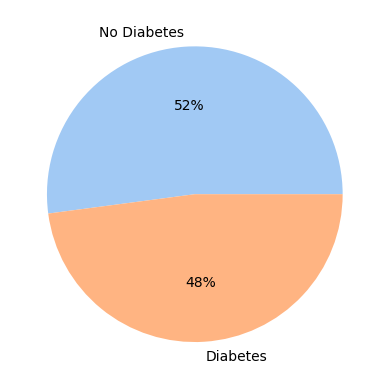

In [ ]:
keys = ['No Diabetes', 'Diabetes']

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
plt.pie(df_diabetic_proportion['claim'], labels=keys, colors=palette_color,
        autopct='%.0f%%')

# displaying chart
plt.show()

In [ ]:
# Proporsi data di setiap smoker (Non & Yes)
# Membuat tabel yang diperlukan
df_smoker_proportion = df_clean.groupby('smoker').agg(
                                              {'claim': 'count'})
df_smoker_proportion

,claim
smoker,
No,1066
Yes,274


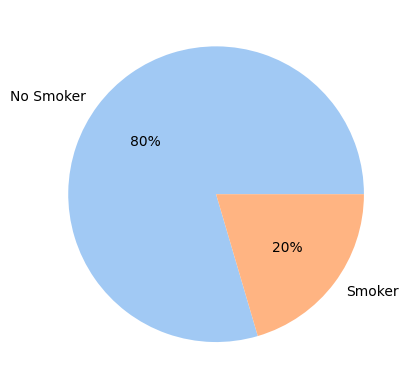

In [ ]:
keys = ['No Smoker', 'Smoker']

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
plt.pie(df_smoker_proportion['claim'], labels=keys, colors=palette_color,
        autopct='%.0f%%')

# displaying chart
plt.show()

In [ ]:
# Proporsi data di setiap	children (Non & Yes)
# Membuat tabel yang diperlukan
df_children_proportion = df_clean.groupby('children').agg(
                                              {'claim': 'count'})
df_children_proportion

,claim
children,
0,576
1,324
2,240
3,157
4,25
5,18


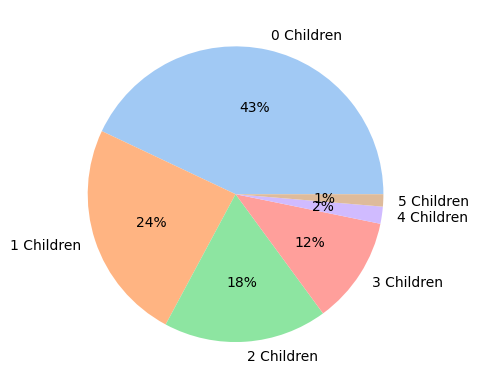

In [ ]:
keys = ['0 Children', '1 Children', '2 Children',
        '3 Children', '4 Children', '5 Children']

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
plt.pie(df_children_proportion['claim'], labels=keys, colors=palette_color,
        autopct='%.0f%%')

# displaying chart
plt.show()

In [ ]:
# Proporsi data di setiap region
# Membuat tabel yang diperlukan
df_region_proportion = df_clean.groupby('region').agg(
                                              {'claim': 'count'})
df_region_proportion

,claim
region,
northeast,231
northwest,349
southeast,446
southwest,314


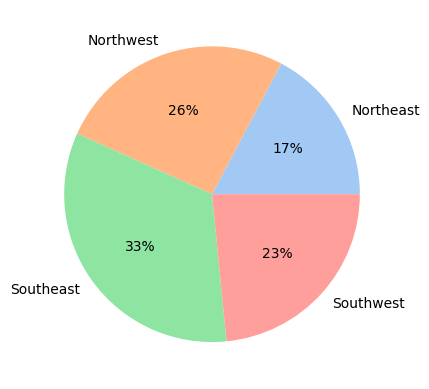

In [ ]:
keys = ['Northeast', 'Northwest', 'Southeast', 'Southwest']

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
plt.pie(df_region_proportion['claim'], labels=keys, colors=palette_color,
        autopct='%.0f%%')

# displaying chart
plt.show()

Result:
- Proporsi data Male sedikit lebih banyak dari Female
- Proporsi data yang tidak terkena diabetes sedikit lebih banyak dari yang terkena diabetes
- Proporsi data Non Smoker lebih banyak dari smoker
- Proporsi data Childern = 0 lebih banyak dari dari yang memiliki childern
- Proporsi data region southeast lebih banyak dari region lain

## Perbandingan variabel claim terhadap variabel lain

In [ ]:
# - Perbandingan Total dan Average Claim terhadap  gender
# Membuat tabel yang diperlukan
df_gender_claim = df_clean.groupby('gender').agg(
                                              mean_clain=('claim', np.mean),
                                              sum_claim=('claim', np.sum))
df_gender_claim

,mean_clain,sum_claim
gender,,
female,12569.578897,8321061.23
male,13919.790457,9437617.93


In [ ]:
# - Perbandingan Total dan Average Claim terhadap diabetic
# Membuat tabel yang diperlukan
df_diabetic_claim = df_clean.groupby('diabetic').agg(
                                              mean_clain=('claim', np.mean),
                                              sum_claim=('claim', np.sum))
df_diabetic_claim

,mean_clain,sum_claim
diabetic,,
No,13354.031991,9321114.33
Yes,13142.624346,8437564.83


In [ ]:
# - Perbandingan Total dan Average Claim terhadap	children
# Membuat tabel yang diperlukan
df_children_claim = df_clean.groupby('children').agg(
                                              mean_clain=('claim', np.mean),
                                              sum_claim=('claim', np.sum))
df_children_claim

,mean_clain,sum_claim
children,,
0,12327.993160,7100924.06
1,12731.171821,4124899.67
2,15073.564000,3617655.36
3,15355.318535,2410785.01
4,13850.656800,346266.42
5,8786.035556,158148.64


In [ ]:
# - Perbandingan Total dan Average Claim terhadap smoker
# Membuat tabel yang diperlukan
df_smoker_claim = df_clean.groupby('smoker').agg(
                                              mean_clain=('claim', np.mean),
                                              sum_claim=('claim', np.sum))
df_smoker_claim

,mean_clain,sum_claim
smoker,,
No,8421.121576,8976915.60
Yes,32050.231971,8781763.56


In [ ]:
# - Perbandingan Total dan Average Claim terhadap	region
# Membuat tabel yang diperlukan
df_region_claim = df_clean.groupby('region').agg(
                                              mean_clain=('claim', np.mean),
                                              sum_claim=('claim', np.sum))
df_region_claim

,mean_clain,sum_claim
region,,
northeast,16889.044719,3901369.33
northwest,11672.088453,4073558.87
southeast,12979.121502,5788688.19
southwest,12723.129841,3995062.77


Result:
- average claim dan total claim Male lebih besar daripada Female
  - Proporsi data Male sedikit lebih banyak dari Female
- average claim dan total claim Non diabetes lebih besar daripada diabetes
  - Proporsi data yang non diabetes sedikit lebih banyak dari yang diabetes
- average claim yang memiliki children = 3 paling besar dan total claim yang memiliki children = 0 paling besar
  - Proporsi data Childern = 0 lebih banyak dari dari yang memiliki childern. Diikuti children = 1, 2, dst.
- average claim smoker lebih besar dari non smoker. Total claim non smoker lebih besar dari smoker
  - Proporsi data Non Smoker lebih banyak dari smoker
- average claim dan total claim southeast lebih besar daripada region lain
  - Proporsi data region southeast lebih banyak dari region lain

## Join PMF dan marginal PMF (Probability & Conditional Probability) & Independence RV


In [ ]:
df_clean.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
# - Peluang Gender terhadap smoker
gender_by_smoker = pd.crosstab(df_clean['gender'],
                               df_clean['smoker'],
                               margins=True)
gender_by_smoker

smoker,No,Yes,All
gender,,,
female,547,115,662
male,519,159,678
All,1066,274,1340


- Peluang gender = Male jika Merokok

$$\text{P}(X=Male|Y=Merokok)=\frac{\text{P}(X=Male \cap Y=Merokok)}{\text{P}(Y=Merokok)}$$

$$\text{P}(X=Male|Y=Merokok)=\frac{159}{274}$$

$$\text{P}(X=Male|Y=Merokok)=0,580$$

- Peluang gender = Female jika Merokok

$$\text{P}(X=Female|Y=Merokok)=\frac{\text{P}(X=Female \cap Y=Merokok)}{\text{P}(Y=Merokok)}$$

$$\text{P}(X=Female|Y=Merokok)=\frac{115}{274}$$

$$\text{P}(X=Female|Y=Merokok)=0,419$$

In [ ]:
# - Peluang Gender terhadap children
gender_by_children = pd.crosstab(df_clean['gender'],
                               df_clean['children'],
                               margins=True)
gender_by_children

children,0,1,2,3,4,5,All
gender,,,,,,,
female,289,158,119,77,11,8,662
male,287,166,121,80,14,10,678
All,576,324,240,157,25,18,1340


- Peluang gender = Male jika Anak = 0

$$\text{P}(X=Male|Y=0)=\frac{\text{P}(X=Male \cap Y=0)}{\text{P}(Y=0)}$$

$$\text{P}(X=Male|Y=0)=\frac{287}{576}$$

$$\text{P}(X=Male|Y=0)=0,498$$

- Peluang gender = Female jika Anak = 0

$$\text{P}(X=Female|Y= 0)=\frac{\text{P}(X=Female \cap Y= 0)}{\text{P}(Y= 0)}$$

$$\text{P}(X=Female|Y= 0)=\frac{289}{576}$$

$$\text{P}(X=Female|Y= 0)=0,502$$

In [12]:
# - Peluang Gender terhadap Region
gender_by_region = pd.crosstab(df_clean['gender'],
                               df_clean['region'],
                               normalize=True)
gender_by_region

region,northeast,northwest,southeast,southwest
gender,,,,
female,0.083582,0.122388,0.167164,0.120896
male,0.088806,0.138060,0.165672,0.113433


In [ ]:
# - Peluang Gender terhadap diabetic
gender_by_diabetic = pd.crosstab(df_clean['gender'],
                               df_clean['diabetic'],
                               normalize=True)
gender_by_diabetic

diabetic,No,Yes
gender,,
female,0.252985,0.241045
male,0.267910,0.238060


In [ ]:
# - Peluang diabetic terhadap Region
diabetic_by_region = pd.crosstab(df_clean['diabetic'],
                               df_clean['region'],
                               normalize=True)
diabetic_by_region

region,northeast,northwest,southeast,southwest
diabetic,,,,
No,0.082090,0.143284,0.168657,0.126866
Yes,0.090299,0.117164,0.164179,0.107463


In [ ]:
# - Peluang diabetic terhadap children
diabetic_by_children = pd.crosstab(df_clean['diabetic'],
                               df_clean['children'],
                               normalize=True)
diabetic_by_children

children,0,1,2,3,4,5
diabetic,,,,,,
No,0.21791,0.133582,0.089552,0.061940,0.009701,0.008209
Yes,0.21194,0.108209,0.089552,0.055224,0.008955,0.005224


In [ ]:
# - Peluang diabetic terhadap smoker
diabetic_by_smoker = pd.crosstab(df_clean['diabetic'],
                               df_clean['smoker'],
                               normalize=True)
diabetic_by_smoker

smoker,No,Yes
diabetic,,
No,0.417910,0.102985
Yes,0.377612,0.101493


In [ ]:
# - Peluang smoker terhadap Region
smoker_by_region = pd.crosstab(df_clean['smoker'],
                               df_clean['region'],
                               normalize=True)
smoker_by_region

region,northeast,northwest,southeast,southwest
smoker,,,,
No,0.122388,0.217164,0.264925,0.191045
Yes,0.050000,0.043284,0.067910,0.043284


In [ ]:
# - Peluang smoker terhadap children
smoker_by_children = pd.crosstab(df_clean['smoker'],
                               df_clean['children'],
                               normalize=True)
smoker_by_children

children,0,1,2,3,4,5
smoker,,,,,,
No,0.344030,0.196269,0.138060,0.088060,0.016418,0.012687
Yes,0.085821,0.045522,0.041045,0.029104,0.002239,0.000746


In [ ]:
# - Peluang children terhadap Region
region_by_children = pd.crosstab(df_clean['region'],
                               df_clean['children'],
                               normalize=True)
region_by_children

children,0,1,2,3,4,5
region,,,,,,
northeast,0.078358,0.042537,0.027612,0.018657,0.004478,0.000746
northwest,0.114925,0.056716,0.049254,0.034328,0.004478,0.000746
southeast,0.141045,0.085075,0.059701,0.036567,0.004478,0.005970
southwest,0.095522,0.057463,0.042537,0.027612,0.005224,0.005970


In [ ]:
df_clean['claim'].median()

9369.615

In [ ]:
# - Peluang claim (>= median or < median) terhadap Region. Cari apakah kedua hal tsb independen atau tidak.
df_claim_class = df_clean.copy()
# create function classifier to classify claim
def classifier_claim(row):
    if row["claim"] >= df_clean['claim'].median():
        return "Diatas sama dengan Median"
    else:
        return "Dibawah Median"

# Membuat kolom baru, claim_class
df_claim_class["claim_class"] = df_claim_class.apply(classifier_claim, axis=1)
df_claim_class.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,claim_class
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Dibawah Median
1,24.0,male,30.1,87,No,0,No,southeast,1131.51,Dibawah Median
2,43.0,male,33.3,82,Yes,0,No,southeast,1135.94,Dibawah Median
3,43.0,male,33.7,80,No,0,No,northwest,1136.40,Dibawah Median
4,43.0,male,34.1,100,No,0,No,northwest,1137.01,Dibawah Median


In [ ]:
region_by_class_claim = pd.crosstab(df_claim_class['region'],
                               df_claim_class['claim_class'],
                               normalize=True)
region_by_class_claim

claim_class,Diatas sama dengan Median,Dibawah Median
region,,
northeast,0.132836,0.039552
northwest,0.117164,0.143284
southeast,0.135075,0.197761
southwest,0.114925,0.119403


In [ ]:
# - Peluang claim (>= median or < median) terhadap diabetic.Cari apakah kedua hal tsb independen atau tidak.
diabetic_by_class_claim = pd.crosstab(df_claim_class['diabetic'],
                               df_claim_class['claim_class'],
                               normalize=True)
diabetic_by_class_claim

claim_class,Diatas sama dengan Median,Dibawah Median
diabetic,,
No,0.258955,0.26194
Yes,0.241045,0.23806


In [ ]:
# - Peluang claim (>= median or < median) terhadap children. Cari apakah kedua hal tsb independen atau tidak.
children_by_class_claim = pd.crosstab(df_claim_class['children'],
                               df_claim_class['claim_class'],
                               normalize=True)
children_by_class_claim

claim_class,Diatas sama dengan Median,Dibawah Median
children,,
0,0.220149,0.209701
1,0.106716,0.135075
2,0.088806,0.090299
3,0.067164,0.050000
4,0.012687,0.005970
5,0.004478,0.008955


- Peluang Children = 0 jika claim diatas sama dengan median

$$\text{P}(X=0|Y=Diatas Median)=\frac{\text{P}(X=0 \cap X=Diatas median)}{\text{P}(Y=Diatas Median)}$$

$$\text{P}(X=0|Y=Diatas Median)=\frac{0,220149	}{0,220149+0,106716+0,088806+0,067164+0,012687+0,004478}$$

$$\text{P}(X=0|Y=Diatas Median)=0,788767$$

- Peluang Children > 0 jika claim diatas sama dengan median

$$\text{P}(X>0|Y=Diatas Median)=\frac{\text{P}(X>0 \cap X=Diatas median)}{\text{P}(Y=Diatas Median)}$$

$$\text{P}(X>0|Y=Diatas Median)=\frac{0,106716+0,088806+0,067164+0,012687+0,004478}{0,220149+0,106716+0,088806+0,067164+0,012687+0,004478}$$

$$\text{P}(X>0|Y=Diatas Median)=0,211233$$

In [ ]:
# - Peluang claim (>= median or < median) terhadap smoker. Cari apakah kedua hal tsb independen atau tidak.
smoker_by_class_claim = pd.crosstab(df_claim_class['smoker'],
                               df_claim_class['claim_class'],
                               normalize=True)
smoker_by_class_claim

claim_class,Diatas sama dengan Median,Dibawah Median
smoker,,
No,0.295522,0.5
Yes,0.204478,0.0


- Peluang Smoker jika claim diatas sama dengan median

$$\text{P}(X=Smoker|Y=Diatas Median)=\frac{\text{P}(X=Smoker \cap Y=Diatas median)}{\text{P}(X=Diatas Median)}$$

$$\text{P}(X=Smoker|Y=Diatas Median)=\frac{0,204478	}{0.204478+0,295522}$$

$$\text{P}(X=Smoker|Y=Diatas Median)=0,408956$$

- Peluang Non-Smoker jika claim diatas sama dengan median

$$\text{P}(X=Non-Smoker|Y=Diatas Median)=\frac{\text{P}(X=Non-Smoker \cap Y=Diatas median)}{\text{P}(X=Diatas Median)}$$

$$\text{P}(X=Non-Smoker|Y=Diatas Median)=\frac{0,295522}{0.204478+0,295522}$$

$$\text{P}(X=Non-Smoker|Y=Diatas Median)=0,591044$$

In [ ]:
# - Peluang claim (>= median or < median) terhadap gender. Cari apakah kedua hal tsb independen atau tidak.
gender_by_class_claim = pd.crosstab(df_claim_class['gender'],
                               df_claim_class['claim_class'],
                               normalize=True)
gender_by_class_claim

claim_class,Diatas sama dengan Median,Dibawah Median
gender,,
female,0.247761,0.246269
male,0.252239,0.253731


- Peluang gender pria jika claim diatas sama dengan median

$$\text{P}(X=Male|Y=Diatas Median)=\frac{\text{P}(X=Male \cap Y=Diatas median)}{\text{P}(X=Diatas Median)}$$

$$\text{P}(X=Male|Y=Diatas Median)=\frac{0,252239}{0,247761+0,252239}$$

$$\text{P}(X=Male|Y=Diatas Median)=0,504478$$

- Peluang gender Wanita jika claim diatas sama dengan median

$$\text{P}(X=Female|Y=Diatas Median)=\frac{\text{P}(X=Female \cap Y=Diatas median)}{\text{P}(X=Diatas Median)}$$

$$\text{P}(X=Female|Y=Diatas Median)=\frac{0,247761}{0,247761+0,252239}$$

$$\text{P}(X=Female|Y=Diatas Median)=0,495522$$

## Menjawab Pertanyaan Soal

1. Gender mana yang memiliki tagihan paling tinggi?
  - Male secara keseluruhan memiliki tagihan paling tinggi. Dengan total tagihan \$9,437,617.93 dan rata-rata tagihan setiap pengguna adalah \$13,919.79

2. Distribusi peluang tagihan di tiap region?

3. Apakah disetiap region memiliki proporsi data banyak orang yang sama?
  - Tidak, southeast memiliki pengguna asuransi terbanyak dibandingkan region lain. Pengguna asuransi di region southeast sebesar	446 orang dari 1340 orang.

4. Mana yang lebih tinggi, proporsi perokok atau non-perokok?
  - Proporsi non-perokok lebh tinggi, sebanyak 1066 orang dari 1340 orang.

5. Berapa peluang seseorang tersebut perempuan diketahui jika dia merokok?
  - P(perempuan|merokok) = 0.085821 / (0.085821 + 0.118657) = 0.419

6. Berapa peluang seseorang tersebut laki-laki diketahui jika dia merokok?
  - P(laki-laki|merokok) = 0.118657 / (0.085821 + 0.118657) = 0.580

7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?


# Analisa Peluang pada Variable Continuous

Objective:
- Mencari peluang kondisi tertentu terhadap tagihan kesehatan
(Mengidentifikasi peluang kondisi tertentu yang berpotensi memiliki besaran variabel tertentu); Namun kali ini pada data continuous


## Objectives

### soal 1
Mana yang lebih mungkin terjadi
- Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k
atau
- Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16,7k

### soal 2
Mana yang lebih mungkin terjadi
- Seseorang dengan perokok mendapatkan tagihan kesehatan diatas 16,7k
atau
- Seseorang dengan non perokok mendapatkan tagihan kesehatan diatas 16,7k

### soal 3
Mana yang lebih mungkin terjadi
- Seseorang dengan diabetic mendapatkan tagihan kesehatan diatas 16,7k
atau
- Seseorang dengan non diabetic mendapatkan tagihan kesehatan diatas 16,7k

### soal 4
Mana yang lebih mungkin terjadi
- Seseorang dengan bp diatas 120 mendapatkan tagihan kesehatan diatas 16,7k
atau
- Seseorang dengan bp dibawah 120 mendapatkan tagihan kesehatan diatas 16,7k

### soal 5
Mana yang lebih mungkin terjadi
- Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan keseharan diatas 16,7k
atau
- Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k

### soal 6
Mana yang lebih mungkin terjadi
- Seseorang diabetic dengan BMI diatas 25 mendapatkan tagihan keseharan diatas 16,7k
atau
- Seseorang non diabetic dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k


### soal 7
Mana yang lebih mungkin terjadi
- Seseorang dengan bp diatas 120 dan dengan BMI diatas 25 mendapatkan tagihan keseharan diatas 16,7k
atau
- Seseorang dengan bp dibawah 120 dan  dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k




### soal 1
Mana yang lebih mungkin terjadi
- Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k
atau
- Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16,7k

In [ ]:
df_bmi_25 = df_clean.copy()
df_bmi_more_25 = df_bmi_25[df_bmi_25['bmi'] >= 25]
df_bmi_less_25 = df_bmi_25[df_bmi_25['bmi'] < 25]
df_bmi_more_25.info()
# df_bmi_less_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 1 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1097 non-null   float64
 1   gender         1097 non-null   object 
 2   bmi            1097 non-null   float64
 3   bloodpressure  1097 non-null   int64  
 4   diabetic       1097 non-null   object 
 5   children       1097 non-null   int64  
 6   smoker         1097 non-null   object 
 7   region         1097 non-null   object 
 8   claim          1097 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 85.7+ KB


In [ ]:
# Seseorang dengan BMI Diatas 25 mendapatkan tagihan kesehatan diatas 16,7k

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_bmi_more_25['claim'].mean() #rata-rata claim
var  = df_bmi_more_25['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.4142681709778062


In [ ]:
# Seseorang dengan BMI Dibawah 25 mendapatkan tagihan kesehatan diatas 16,7k

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_bmi_less_25['claim'].mean() #rata-rata claim
var  = df_bmi_less_25['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.19436283999484405


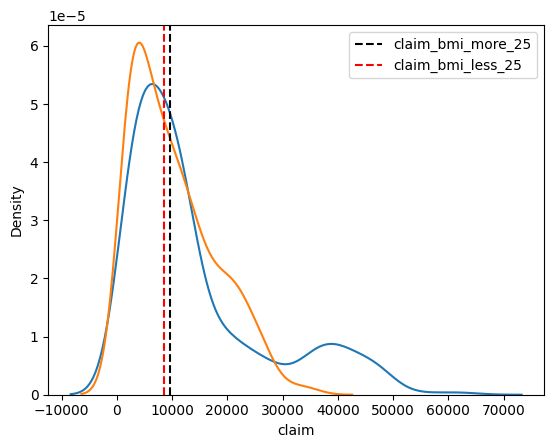

In [ ]:
# Plot distribution
fig = sns.distplot(df_bmi_more_25['claim'], label='claim_bmi_more_25', hist=False)
fig = sns.distplot(df_bmi_less_25['claim'], label='claim_bmi_less_25', hist=False)

# plot lines of their mean (expected value)
line1 = plt.axvline(df_bmi_more_25['claim'].median(), color="k", linestyle="--", label = "claim_bmi_more_25")
line2 = plt.axvline(df_bmi_less_25['claim'].median(), color="r", linestyle="--", label = "claim_bmi_less_25")

# add legend
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

### soal 2
Mana yang lebih mungkin terjadi
- Seseorang dengan perokok mendapatkan tagihan kesehatan diatas 16,7k
atau
- Seseorang dengan non perokok mendapatkan tagihan kesehatan diatas 16,7k

In [ ]:
df_smoke = df_clean.copy()
df_smoke_yes = df_smoke[df_smoke['smoker'] == "Yes"]
df_smoke_no = df_smoke[df_smoke['smoker'] == "No"]
df_smoke_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 0 to 1225
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1066 non-null   float64
 1   gender         1066 non-null   object 
 2   bmi            1066 non-null   float64
 3   bloodpressure  1066 non-null   int64  
 4   diabetic       1066 non-null   object 
 5   children       1066 non-null   int64  
 6   smoker         1066 non-null   object 
 7   region         1066 non-null   object 
 8   claim          1066 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 83.3+ KB


In [ ]:
# Seseorang dengan perokok mendapatkan tagihan kesehatan diatas 16,7k

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_smoke_yes['claim'].mean() #rata-rata claim
var  = df_smoke_yes['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.9082404933920498


In [ ]:
# Seseorang dengan non perokok mendapatkan tagihan kesehatan diatas 16,7k

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_smoke_no['claim'].mean() #rata-rata claim
var  = df_smoke_no['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.08367489790912663


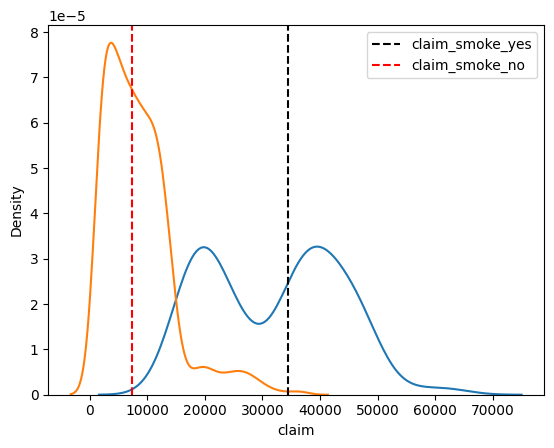

In [ ]:
# Plot distribution
fig = sns.distplot(df_smoke_yes['claim'], label='claim_smoke_yes', hist=False)
fig = sns.distplot(df_smoke_no['claim'], label='claim_smoke_no', hist=False)

# plot lines of their mean (expected value)
line1 = plt.axvline(df_smoke_yes['claim'].median(), color="k", linestyle="--", label = "claim_smoke_yes")
line2 = plt.axvline(df_smoke_no['claim'].median(), color="r", linestyle="--", label = "claim_smoke_no")

# add legend
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

### soal 3
Mana yang lebih mungkin terjadi
- Seseorang dengan diabetic mendapatkan tagihan kesehatan diatas 16,7k
atau
- Seseorang dengan non diabetic mendapatkan tagihan kesehatan diatas 16,7k


In [ ]:
df_diabet = df_clean.copy()
df_diabet_yes = df_diabet[df_diabet['diabetic'] == "Yes"]
df_diabet_no = df_diabet[df_diabet['diabetic'] == "No"]
df_diabet_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 1 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            698 non-null    float64
 1   gender         698 non-null    object 
 2   bmi            698 non-null    float64
 3   bloodpressure  698 non-null    int64  
 4   diabetic       698 non-null    object 
 5   children       698 non-null    int64  
 6   smoker         698 non-null    object 
 7   region         698 non-null    object 
 8   claim          698 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 54.5+ KB


In [ ]:
# Seseorang dengan diabetic mendapatkan tagihan kesehatan diatas 16,7k

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_diabet_yes['claim'].mean() #rata-rata claim
var  = df_diabet_yes['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.38283113421424875


In [ ]:
# Seseorang dengan non diabetic mendapatkan tagihan kesehatan diatas 16,7k

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_diabet_no['claim'].mean() #rata-rata claim
var  = df_diabet_no['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.3925897355748845


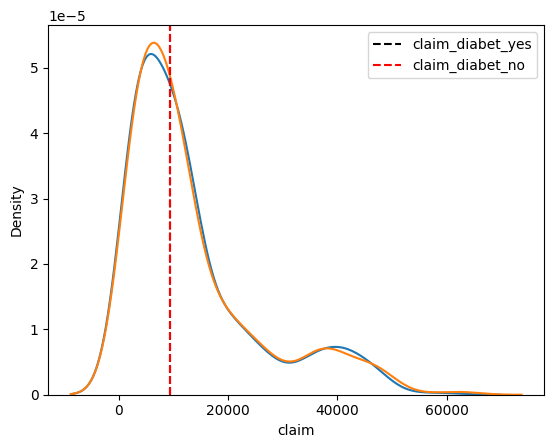

In [ ]:
# Plot distribution
fig = sns.distplot(df_diabet_yes['claim'], label='claim_diabet_yes', hist=False)
fig = sns.distplot(df_diabet_no['claim'], label='claim_diabet_no', hist=False)

# plot lines of their mean (expected value)
line1 = plt.axvline(df_diabet_yes['claim'].median(), color="k", linestyle="--", label = "claim_diabet_yes")
line2 = plt.axvline(df_diabet_no['claim'].median(), color="r", linestyle="--", label = "claim_diabet_no")

# add legend
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

### soal 4
Mana yang lebih mungkin terjadi
- Seseorang dengan bp diatas 120 mendapatkan tagihan kesehatan diatas 16,7k
atau
- Seseorang dengan bp dibawah 120 mendapatkan tagihan kesehatan diatas 16,7k


In [ ]:
df_bp_120 = df_clean.copy()
df_bp_more_120 = df_bp_120[df_bp_120['bloodpressure'] > 120]
df_bp_less_120 = df_bp_120[df_bp_120['bloodpressure'] <= 120]
# df_bp_more_120.info()
df_bp_less_120.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1285 non-null   float64
 1   gender         1285 non-null   object 
 2   bmi            1285 non-null   float64
 3   bloodpressure  1285 non-null   int64  
 4   diabetic       1285 non-null   object 
 5   children       1285 non-null   int64  
 6   smoker         1285 non-null   object 
 7   region         1285 non-null   object 
 8   claim          1285 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 100.4+ KB


In [ ]:
# Seseorang dengan bp diatas 120 mendapatkan tagihan kesehatan diatas 16,7k

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_bp_more_120['claim'].mean() #rata-rata claim
var  = df_bp_more_120['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.9992108963333626


In [ ]:
# Seseorang dengan bp dibawah 120 mendapatkan tagihan kesehatan diatas 16,7k

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_bp_less_120['claim'].mean() #rata-rata claim
var  = df_bp_less_120['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.3446455312696082


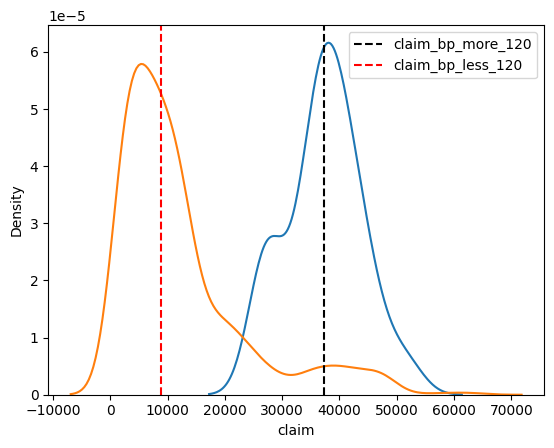

In [ ]:
# Plot distribution
fig = sns.distplot(df_bp_more_120['claim'], label='claim_bp_more_120', hist=False)
fig = sns.distplot(df_bp_less_120['claim'], label='claim_bp_less_120', hist=False)

# plot lines of their mean (expected value)
line1 = plt.axvline(df_bp_more_120['claim'].median(), color="k", linestyle="--", label = "claim_bp_more_120")
line2 = plt.axvline(df_bp_less_120['claim'].median(), color="r", linestyle="--", label = "claim_bp_less_120")

# add legend
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

### soal 5
Mana yang lebih mungkin terjadi
- Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan keseharan diatas 16,7k
atau
- Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k



In [ ]:
df_smoke_bmi = df_clean.copy()
df_smoke_bmi_25 = df_smoke_bmi[(df_smoke_bmi['bmi'] >= 25) & (df_smoke_bmi['smoker'] == "Yes")]
df_nosmoke_bmi_25 = df_smoke_bmi[(df_smoke_bmi['bmi'] >= 25) & (df_smoke_bmi['smoker'] == "No")]
df_smoke_bmi_25.info()
# df_nosmoke_bmi_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 988 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            219 non-null    float64
 1   gender         219 non-null    object 
 2   bmi            219 non-null    float64
 3   bloodpressure  219 non-null    int64  
 4   diabetic       219 non-null    object 
 5   children       219 non-null    int64  
 6   smoker         219 non-null    object 
 7   region         219 non-null    object 
 8   claim          219 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 17.1+ KB


In [ ]:
# Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan keseharan diatas 16,7k

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_smoke_bmi_25['claim'].mean() #rata-rata claim
var  = df_smoke_bmi_25['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.957355950318069


In [ ]:
# Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_nosmoke_bmi_25['claim'].mean() #rata-rata claim
var  = df_nosmoke_bmi_25['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.09129471994490412


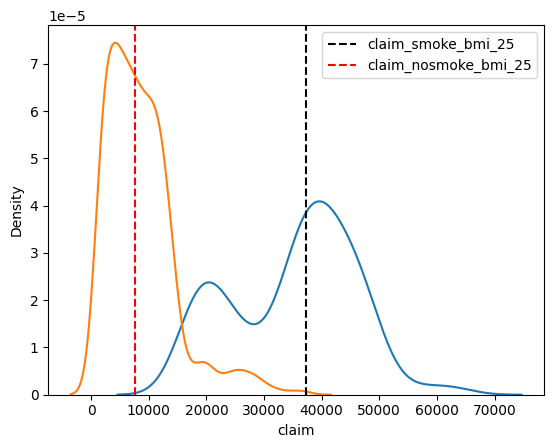

In [ ]:
# Plot distribution
fig = sns.distplot(df_smoke_bmi_25['claim'], label='claim_smoke_bmi_25', hist=False)
fig = sns.distplot(df_nosmoke_bmi_25['claim'], label='claim_nosmoke_bmi_25', hist=False)

# plot lines of their mean (expected value)
line1 = plt.axvline(df_smoke_bmi_25['claim'].median(), color="k", linestyle="--", label = "claim_smoke_bmi_25")
line2 = plt.axvline(df_nosmoke_bmi_25['claim'].median(), color="r", linestyle="--", label = "claim_nosmoke_bmi_25")

# add legend
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

### soal 6
Mana yang lebih mungkin terjadi
- Seseorang diabetic dengan BMI diatas 25 mendapatkan tagihan keseharan diatas 16,7k
atau
- Seseorang non diabetic dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k




In [ ]:
df_diabet_bmi = df_clean.copy()
df_diabet_bmi_25 = df_diabet_bmi[(df_diabet_bmi['bmi'] >= 25) & (df_diabet_bmi['diabetic'] == "Yes")]
df_nodiabet_bmi_25 = df_diabet_bmi[(df_diabet_bmi['bmi'] >= 25) & (df_diabet_bmi['diabetic'] == "No")]
# df_diabet_bmi_25.info()
df_nodiabet_bmi_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            583 non-null    float64
 1   gender         583 non-null    object 
 2   bmi            583 non-null    float64
 3   bloodpressure  583 non-null    int64  
 4   diabetic       583 non-null    object 
 5   children       583 non-null    int64  
 6   smoker         583 non-null    object 
 7   region         583 non-null    object 
 8   claim          583 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 45.5+ KB


In [ ]:
# Seseorang diabetic dengan BMI diatas 25 mendapatkan tagihan keseharan diatas 16,7k

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_diabet_bmi_25['claim'].mean() #rata-rata claim
var  = df_diabet_bmi_25['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.41013474063433986


In [ ]:
# Seseorang non diabetic dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_nodiabet_bmi_25['claim'].mean() #rata-rata claim
var  = df_nodiabet_bmi_25['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.41790530359026534


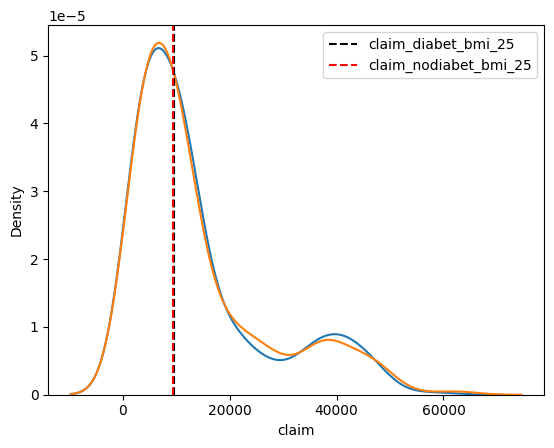

In [ ]:
# Plot distribution
fig = sns.distplot(df_diabet_bmi_25['claim'], label='claim_diabet_bmi_25', hist=False)
fig = sns.distplot(df_nodiabet_bmi_25['claim'], label='claim_nodiabet_bmi_25', hist=False)

# plot lines of their mean (expected value)
line1 = plt.axvline(df_diabet_bmi_25['claim'].median(), color="k", linestyle="--", label = "claim_diabet_bmi_25")
line2 = plt.axvline(df_nodiabet_bmi_25['claim'].median(), color="r", linestyle="--", label = "claim_nodiabet_bmi_25")

# add legend
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

### soal 7
Mana yang lebih mungkin terjadi
- Seseorang dengan bp diatas 120 dan dengan BMI diatas 25 mendapatkan tagihan keseharan diatas 16,7k
atau
- Seseorang dengan bp dibawah 120 dan  dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7

In [ ]:
df_bp_bmi = df_clean.copy()
df_bphigh_bmi_25 = df_bp_bmi[(df_bp_bmi['bmi'] >= 25) & (df_bp_bmi['bloodpressure'] > 120)]
df_bplow_bmi_25 = df_bp_bmi[(df_bp_bmi['bmi'] >= 25) & (df_bp_bmi['bloodpressure'] <= 120)]
# df_bphigh_bmi_25.info()
df_bplow_bmi_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 1 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1045 non-null   float64
 1   gender         1045 non-null   object 
 2   bmi            1045 non-null   float64
 3   bloodpressure  1045 non-null   int64  
 4   diabetic       1045 non-null   object 
 5   children       1045 non-null   int64  
 6   smoker         1045 non-null   object 
 7   region         1045 non-null   object 
 8   claim          1045 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 81.6+ KB


In [ ]:
# Seseorang dengan bp diatas 120 dan dengan BMI diatas 25 mendapatkan tagihan keseharan diatas 16,7k

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_bphigh_bmi_25['claim'].mean() #rata-rata claim
var  = df_bphigh_bmi_25['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.9996781402993548


In [ ]:
# Seseorang dengan bp dibawah 120 dan dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7

from scipy.stats import norm

# menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 16700 #batas nilai claim
mean = df_bplow_bmi_25['claim'].mean() #rata-rata claim
var  = df_bplow_bmi_25['claim'].var() #variance claim
std = np.sqrt(var) #standar deviasi dari variance
X = (x-mean)/std #nilai yang telah di normalisasi
P1 = norm.cdf(X,0,1)
jawaban = 1 - P1
print('Peluang', jawaban)

Peluang 0.3689290341004178


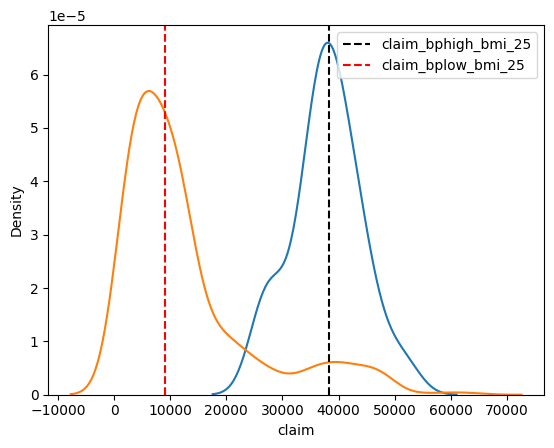

In [ ]:
# Plot distribution
fig = sns.distplot(df_bphigh_bmi_25['claim'], label='claim_bphigh_bmi_25', hist=False)
fig = sns.distplot(df_bplow_bmi_25['claim'], label='claim_bplow_bmi_25', hist=False)

# plot lines of their mean (expected value)
line1 = plt.axvline(df_bphigh_bmi_25['claim'].median(), color="k", linestyle="--", label = "claim_bphigh_bmi_25")
line2 = plt.axvline(df_bplow_bmi_25['claim'].median(), color="r", linestyle="--", label = "claim_bplow_bmi_25")

# add legend
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

## Menjawab Pertanyaan Soal

1. Soal 1
Mana yang lebih mungkin terjadi
- Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k
atau
- Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16,7k
  - Peluang Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k adalah **0.414**
  - Peluang Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16,7k adalah **0.194**
  - Jadi, peluang yang lebih besar adalah seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7K


2. Soal 2
Mana yang lebih mungkin terjadi
- Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan keseharan diatas 16,7k
atau
- Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k
  - Peluang Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan keseharan diatas 16,7k adalah **0.957**
  - Peluang Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k adalah **0.091**
  - Jadi, peluang yang lebih besar adalah  Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan keseharan diatas 16,7k


# Analisa Korelasi Variabel

Objective:
- Mencari hubungan antara kondisi-kondisi dengan variabel yang kita inginkan
- Mencari variabel yang paling berhubungan dengan data claim


## To Do

- cari kovarians dan correlation


### Label Encoding

Label Encoding digunakan pada:
- Kolom kategorikal dengan jumlah distinct values = 2. E.g. Gender, respon ya/tidak, etc

- Kolom kategorikal dengan tipe ordinal (punya urutan). E.g.
tingkat pendidikan, intensitas (rendah/medium/tinggi),
socio-economic status (A/B/C/D), etc

- Sisanya pakai one-hot-encoding

In [ ]:
df_clean.sample(5)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
139,26.0,female,35.7,90,Yes,0,No,northwest,2404.73
979,26.0,female,22.4,100,Yes,0,Yes,northwest,14711.74
1086,44.0,male,24.4,110,No,0,Yes,southeast,21223.68
622,36.0,male,23.6,86,No,2,No,northeast,8603.82
136,40.0,male,32.4,81,No,1,No,northwest,2362.23


In [ ]:
# Copy dataset
df_encode = df_clean.copy()

In [ ]:
# diabetic
mapping_edu = {
  'No' : 0,
  'Yes': 1
}

df_encode['diabetic'] = df_encode['diabetic'].map(mapping_edu)

In [ ]:
# smoker
mapping_edu = {
  'No' : 0,
  'Yes': 1
}

df_encode['smoker'] = df_encode['smoker'].map(mapping_edu)

In [ ]:
# gender
mapping_edu = {
  'male' : 0,
  'female': 1
}

df_encode['gender'] = df_encode['gender'].map(mapping_edu)

In [ ]:
df_encode.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,0,23.2,91,1,0,0,southeast,1121.87
1,24.0,0,30.1,87,0,0,0,southeast,1131.51
2,43.0,0,33.3,82,1,0,0,southeast,1135.94
3,43.0,0,33.7,80,0,0,0,northwest,1136.40
4,43.0,0,34.1,100,0,0,0,northwest,1137.01


In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   int64  
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   int64  
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   int64  
 7   region         1340 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 94.3+ KB


### One Hot Encoding

In [ ]:
categorical_cols = [col for col in df_encode.select_dtypes(include='object').columns.tolist()]
categorical_cols

['region']

In [ ]:
onehot = pd.get_dummies(df_encode[categorical_cols], drop_first=True)

In [ ]:
df_en = pd.concat([df_encode[['age', 'gender',
                              'bmi', 'bloodpressure',
                              'diabetic', 'children',
                              'smoker']], onehot ,df_encode[['claim']]], axis=1)

In [ ]:
df_en.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region_northwest,region_southeast,region_southwest,claim
0,39.0,0,23.2,91,1,0,0,0,1,0,1121.87
1,24.0,0,30.1,87,0,0,0,0,1,0,1131.51
2,43.0,0,33.3,82,1,0,0,0,1,0,1135.94
3,43.0,0,33.7,80,0,0,0,1,0,0,1136.40
4,43.0,0,34.1,100,0,0,0,1,0,0,1137.01


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df_encode.corr())



                    age    gender       bmi  bloodpressure  diabetic  \
age            1.000000  0.391108 -0.040847      -0.061001 -0.025650   
gender         0.391108  1.000000 -0.046812      -0.012437  0.017428   
bmi           -0.040847 -0.046812  1.000000       0.143544 -0.036969   
bloodpressure -0.061001 -0.012437  0.143544       1.000000 -0.012689   
diabetic      -0.025650  0.017428 -0.036969      -0.012689  1.000000   
children      -0.027002 -0.015800  0.012092      -0.031682 -0.014739   
smoker        -0.032655 -0.075366  0.003670       0.418265  0.017502   
claim         -0.029505 -0.055766  0.197401       0.531341 -0.008725   

               children    smoker     claim  
age           -0.027002 -0.032655 -0.029505  
gender        -0.015800 -0.075366 -0.055766  
bmi            0.012092  0.003670  0.197401  
bloodpressure -0.031682  0.418265  0.531341  
diabetic      -0.014739  0.017502 -0.008725  
children       1.000000  0.008355  0.069233  
smoker         0.008355  1.00

<ipython-input-94-713e576bf5a9>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_encode.corr())


<ipython-input-95-73955c7cd496>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleanplot = sns.heatmap(df_encode.corr(), cmap="YlGnBu", annot=True)


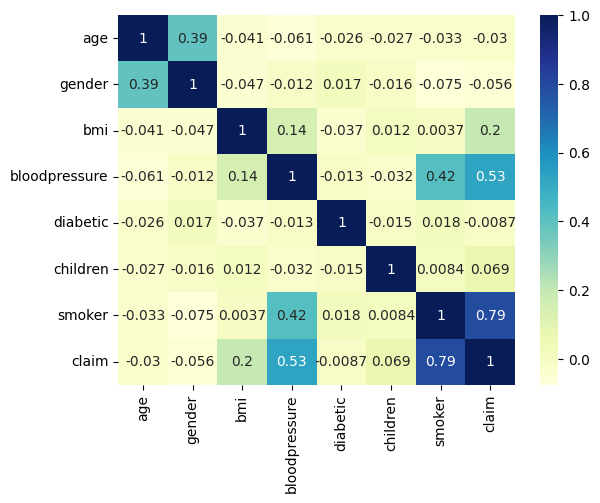

In [ ]:
# plotting correlation heatmap
df_cleanplot = sns.heatmap(df_encode.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

## Menjawab pertanyaan

- Berdasarkan heatmap diatas, bisa terlihat claim/tagihan berkorelasi cukup tinggi pada 'smoker' dan 'bloodpreassure'.
  - Korelasi antara claim dan 'smoker' adalah 0,79
  - Korelasi antara claim dan 'bloodpreassure' adalah 0,53

- Berdasarkan heatmap diatas, claim/tagihan berkorelasi rendah dengan age, gender, bmi, diabetic dan children

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/#:~:text=High%20degree%3A%20If%20the%20coefficient,to%20be%20a%20small%20correlation.

# Pengujian Hipotesis

## Review materi Hipotesis Testing:

1. Hipotesis
    - Pembuatan hipotesis berdasarkan pertanyaan penelitian atau bisnis
    
    
2. Significance Level
    - Tingkat signifikansi yang umum adalah 0.05
    - Semakin rendah signifincance level, semakin kita percaya terhadap penelitian kita
    - Jika penelitian memiliki resiko yang tinggi, bisa set significance level serendah mungkin
    
    
3. Statistik Uji
    - Macam macam statistik uji: z test, t test, chi-square test, dll.
    - Ada banyak sekali statistik uji, terkait rata-rata, varians, dan proporsi.
    - Di notebook kali ini kita akan bahas tes terkait pengujian rata rata 1 dan 2 sampel saja
    -  kalau mau uji mean sample, itu pakai t-test (untuk sample yg sedikit) atau z-test (untuk sample yang banyak)
    - Statistik uji di hitung dengan menggunakan informasi dari data sampel
    
    
4. Aturan Keputusan
    - Aturan keputusan didasarkan tiga hal, level signifikansi, distribusi statistik uji, dan tipe uji
        - level signifikansi menentukan titik kritis, atau daerah penolakan
        - distribusi statistik uji menentukan titik kritis berdasarkan distribusi uji
        - tipe uji menentukan daerah penolakan di sebelah mana
            - jika pada $H_1$ ada tanda '$<$,$\leq$' maka, daerah penolakan ada di sebelah kiri
            - jika pada $H_1$ ada tanda
'$>$,$\geq$'
            maka, daerah penolakan ada di sebelah kanan
            - jika pada $H_1$ ada tanda
'$\not=$'
            maka, daerah penolakan ada di sebelah kanan dan kiri
    - Aturan keputusan bisa dilakukan dengan 2 cara:
        - Membandingkan nilai statistik uji dan nilai kritis
            - Uji Pihak Kiri, stats uji
            $<$ nilai kritis ; tolak h0
            - Uji Pihak Kanan, stats uji $>$ nilai kritis ; tolak h0
            - Uji Dua Pihak, stats uji $>$ nilai kritis atau stats uji $<$ -nilai kritis (untuk distribusi t&z saja); tolak h0
        - Membandingkan p-value dan alpha
            - Untuk semua uji, pvalue < alpha ; tolak h0
    - Cara menghitung pvalue
        - pada Uji Pihak Kiri

    $$p_{value}=P(T \leq t_{hitung})$$

        - pada Uji Pihak Kanan

    $$p_{value}=P(T \geq t_{hitung})$$

        - pada Uji 2 Pihak

    $$p_{value}=2\times min(P(T \leq t_{hitung}), 1-P(T \leq t_{hitung}))$$

    - `T` = variable random distribusi statistik uji
    -`t_hitung` = nilai statistik uji yang didapatkan

Notes:
- Perbedaan z-test dan t-test:
  - https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/#:~:text=A.,the%20population%20variance%20is%20unknown.
  - https://vitalflux.com/when-to-use-z-test-vs-t-test-differences-examples/
- Materi tambahan tentang t-test: https://www.scribbr.com/statistics/t-test/#:~:text=A%20t%20test%20is%20a,are%20different%20from%20one%20another.
- Assumption Homogenity of Variance: https://www.statisticssolutions.com/the-assumption-of-homogeneity-of-variance/


In [ ]:
df_clean.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,100,No,0,No,northwest,1137.01


## Goals & Objective

Goals:
- Menguji Claim tentang tagihan kesehatan

Obejctive:

Pengujian hipotesis
- Pengujian Mean 2 populasi (t test / z test)
  - Tagihan kesehatan perokok lebih besar daripada tagihan kesehatan non perokok
  - Tagihan kesehatan diabetes lebih besar daripada tagihan kesehatan non diabetes
  - Tagihan kesehatan pria lebih besar daripada tagihan kesehatan wanita
  - Tagihan kesehatan bp >120 lebih besar daripada tagihan kesehatan bp <= 120
  - Tagihan kesehatan bmi >= 25 lebih besar daripada tagihan kesehatan bmi < 25
  - Tagihan kesehatan age <= 40 lebih besar dari age > 40

- Varians 2 populasi (F distribution)
  - Varians tagihan kesehatan perokok dan non perokok sama
  - Varians tagihan kesehatan diabetic dan non diabetic sama
  - Varians tagihan kesehatan bmi >= 25 dan bmi <= 25 sama
  - Varians tagihan kesehatan bp > 120 dan bp <= 120 sama
  - Varians tagihan kesehatan pria dan wanita sama
  - Varians tagihan kesehatan age <= 40 lebih besar dari age > 40


- pengujian proporsi 2 populasi (z test)
  - Proporsi data pria perokok lebih besar daripada wanita perokok



## T-Tes/ Z-Test

- Pengujian Mean 2 populasi (t test / z test)
  - Tagihan kesehatan perokok lebih besar daripada tagihan kesehatan non perokok
  - Tagihan kesehatan diabetes lebih besar daripada tagihan kesehatan non diabetes
  - Tagihan kesehatan pria lebih besar daripada tagihan kesehatan wanita
  - Tagihan kesehatan bp >120 lebih besar daripada tagihan kesehatan bp <= 120
  - Tagihan kesehatan bmi >= 25 lebih besar daripada tagihan kesehatan bmi < 25
  - Tagihan kesehatan age <= 40 lebih besar dari age > 40

 ### 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non-perokok?

#### 3.0 Inisiasi data sampel

In [ ]:
# Inisialisasi data sampel
# Data yang akan diuji

df_hipot = df_clean.copy()
df_perokok = df_hipot[df_hipot['smoker'] == 'Yes']
df_perokok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 894 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            274 non-null    float64
 1   gender         274 non-null    object 
 2   bmi            274 non-null    float64
 3   bloodpressure  274 non-null    int64  
 4   diabetic       274 non-null    object 
 5   children       274 non-null    int64  
 6   smoker         274 non-null    object 
 7   region         274 non-null    object 
 8   claim          274 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.4+ KB


In [ ]:
df_non_perokok = df_hipot[df_hipot['smoker'] == 'No']
df_non_perokok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 0 to 1225
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1066 non-null   float64
 1   gender         1066 non-null   object 
 2   bmi            1066 non-null   float64
 3   bloodpressure  1066 non-null   int64  
 4   diabetic       1066 non-null   object 
 5   children       1066 non-null   int64  
 6   smoker         1066 non-null   object 
 7   region         1066 non-null   object 
 8   claim          1066 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 83.3+ KB


#### 3.1. Hipotesis dan Significance Level

Maka hipotesis yang akan kita uji adalah:
$$H_0: \mu_{tagihan-perokok} \geq  \mu_{tagihan-nonperokok}$$
$$H_1: \mu_{tagihan-perokok} <  \mu_{tagihan-nonperokok}$$

In [ ]:
# inisialisasi nilai alpha
alpha = 0.05

#### 3.2. Tentukan statistik uji

Statistik yang diuji terkait rata rata, namun karna kita tidak mengetahui standar deviasi populasi, maka kita akan gunakan t-test pada 2 sampel

Ini referensi kalo datanya sedikit: (buka komen nya)
<!-- - Daerah Penolakan ada di sebelah kanan dan kiri, dengan nilai kritis 1.83 dan -1.83
- Ada 2 cara pengambilan keputusan
  - jika kita mendapatkan nilai pvalue kurang dari alpha, maka kita tolak $H_0$
  - jika kita mendapatkan statistik uji lebih dari nilai kritis 1.83 atau statistik uji kurang dari nilai kritis -1.83, maka kita tolak $H_0$ -->

#### 3.3. Aturan Keputusan

- Alpha = 0.05
- Uji Pihak Kiri (dalam $H_1$ mengandung tanda $<$)

#### 3.4. Hitung statistik uji

In [ ]:
# Langkah pertama adalah check variance dari kedua populasi (varian tagihan smoker dan non-smoker)
np.var(df_non_perokok['claim']), np.var(df_perokok['claim'])

(35916411.9013174, 132721156.87591876)

##### Cara menggunakan perhitungan uji statistik t untuk uji rata rata 2 sampel menggunakan scipy.stats

1. import library yang dibutuhkan

    - 'from scipy.stats import [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)'
    
    
2. gunakan fungsi `ttest_ind(a = ... , b = ... , equal_var = ... , alternative = ... )` dengan memasukkan parameter:
    - `a` : data sampel yang diuji (data1)
    - `b` : data sampel yang diuji (data2)
    - `equal_var` : kondisi apakah kedua sampel punya varians yang sama atau tidak isi dengan `True` atau `False`
    - `alternative` : uji pihak yang dilakukan, cek $H_1$
        - jika pada
  $H_1$ ada tanda '$<$,$\leq$' maka gunakan 'less' untuk uji pihak kiri
        - jika pada
  $H_1$ ada tanda '$>$,$\geq$' maka gunakan 'greater' : uji pihak kanan
        - jika pada
  $H_1$ ada tanda '$\not=$' maka gunakan 'two-sided' : uji pihak kanan-kiri
        
3. fungsi tersebut akan mengeluarkan 2 output yaitu nilai statistik uji, dan p-value

In [ ]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = df_perokok['claim'], b = df_non_perokok['claim'], equal_var=False, alternative='less')
# eaual_var= False karena varians kedua populasi berbeda
# karena kedua varians sample yang ada berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p))

Statistics = 32.7714, p-value = 1.0000


#### 3.5. Pengambilan Keputusan

In [ ]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)')
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


Maka dapat kita simpulkan bahwa Claim perokok lebih besar daripada Claim non-perokok

 ### 2. Tagihan kesehatan diabetes lebih besar daripada tagihan kesehatan non diabetes



#### 3.0 Inisiasi data sampel

In [ ]:
# Inisialisasi data sampel
# Data yang akan diuji

# df_hipot = df_clean.copy()
df_diabetic = df_hipot[df_hipot['diabetic'] == 'Yes']
df_diabetic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            642 non-null    float64
 1   gender         642 non-null    object 
 2   bmi            642 non-null    float64
 3   bloodpressure  642 non-null    int64  
 4   diabetic       642 non-null    object 
 5   children       642 non-null    int64  
 6   smoker         642 non-null    object 
 7   region         642 non-null    object 
 8   claim          642 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 50.2+ KB


In [ ]:
df_non_diabetic = df_hipot[df_hipot['diabetic'] == 'No']
df_non_diabetic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 1 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            698 non-null    float64
 1   gender         698 non-null    object 
 2   bmi            698 non-null    float64
 3   bloodpressure  698 non-null    int64  
 4   diabetic       698 non-null    object 
 5   children       698 non-null    int64  
 6   smoker         698 non-null    object 
 7   region         698 non-null    object 
 8   claim          698 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 54.5+ KB


#### 3.1. Hipotesis dan Significance Level

Maka hipotesis yang akan kita uji adalah:
$$H_0: \mu_{tagihan-diabetic} \geq  \mu_{tagihan-nondiabetic}$$
$$H_1: \mu_{tagihan-diabetic} <  \mu_{tagihan-nondiabetic}$$

In [ ]:
# inisialisasi nilai alpha
alpha = 0.05

#### 3.2. Tentukan statistik uji

Statistik yang diuji terkait rata rata, namun karna kita tidak mengetahui standar deviasi populasi, maka kita akan gunakan t-test pada 2 sampel

Ini referensi kalo datanya sedikit: (buka komen nya)
<!-- - Daerah Penolakan ada di sebelah kanan dan kiri, dengan nilai kritis 1.83 dan -1.83
- Ada 2 cara pengambilan keputusan
  - jika kita mendapatkan nilai pvalue kurang dari alpha, maka kita tolak $H_0$
  - jika kita mendapatkan statistik uji lebih dari nilai kritis 1.83 atau statistik uji kurang dari nilai kritis -1.83, maka kita tolak $H_0$ -->

#### 3.3. Aturan Keputusan

- Alpha = 0.05
- Uji Pihak Kiri (dalam $H_1$ mengandung tanda $<$)

#### 3.4. Hitung statistik uji

In [ ]:
# Langkah pertama adalah check variance dari kedua populasi (varian tagihan diabetic dan non-diabetic)
np.var(df_non_diabetic['claim']), np.var(df_diabetic['claim'])

(150468978.9878363, 142230837.50882518)

##### Cara menggunakan perhitungan uji statistik t untuk uji rata rata 2 sampel menggunakan scipy.stats

1. import library yang dibutuhkan

    - 'from scipy.stats import [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)'
    
    
2. gunakan fungsi `ttest_ind(a = ... , b = ... , equal_var = ... , alternative = ... )` dengan memasukkan parameter:
    - `a` : data sampel yang diuji (data1)
    - `b` : data sampel yang diuji (data2)
    - `equal_var` : kondisi apakah kedua sampel punya varians yang sama atau tidak isi dengan `True` atau `False`
    - `alternative` : uji pihak yang dilakukan, cek $H_1$
        - jika pada
  $H_1$ ada tanda '$<$,$\leq$' maka gunakan 'less' untuk uji pihak kiri
        - jika pada
  $H_1$ ada tanda '$>$,$\geq$' maka gunakan 'greater' : uji pihak kanan
        - jika pada
  $H_1$ ada tanda '$\not=$' maka gunakan 'two-sided' : uji pihak kanan-kiri
        
3. fungsi tersebut akan mengeluarkan 2 output yaitu nilai statistik uji, dan p-value

In [ ]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = df_diabetic['claim'], b = df_non_diabetic['claim'], equal_var=False, alternative='less')
# eaual_var= False karena varians kedua populasi berbeda
# karena kedua varians sample yang ada berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p))

Statistics = -0.3195, p-value = 0.3747


#### 3.5. Pengambilan Keputusan

In [ ]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)')
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


Maka dapat kita simpulkan bahwa Claim diabetes lebih besar daripada Claim non-diabetes

 ### 3. Tagihan kesehatan pria lebih besar daripada tagihan kesehatan wanita


#### 3.0 Inisiasi data sampel

In [ ]:
df_clean.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
# Inisialisasi data sampel
# Data yang akan diuji

# df_hipot = df_clean.copy()
df_gender_male = df_hipot[df_hipot['gender'] == 'male']
df_gender_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 1338
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            678 non-null    float64
 1   gender         678 non-null    object 
 2   bmi            678 non-null    float64
 3   bloodpressure  678 non-null    int64  
 4   diabetic       678 non-null    object 
 5   children       678 non-null    int64  
 6   smoker         678 non-null    object 
 7   region         678 non-null    object 
 8   claim          678 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 53.0+ KB


In [ ]:
df_gender_female = df_hipot[df_hipot['gender'] == 'female']
df_gender_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 24 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            662 non-null    float64
 1   gender         662 non-null    object 
 2   bmi            662 non-null    float64
 3   bloodpressure  662 non-null    int64  
 4   diabetic       662 non-null    object 
 5   children       662 non-null    int64  
 6   smoker         662 non-null    object 
 7   region         662 non-null    object 
 8   claim          662 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 51.7+ KB


#### 3.1. Hipotesis dan Significance Level

Maka hipotesis yang akan kita uji adalah:
$$H_0: \mu_{tagihan-male} \geq  \mu_{tagihan-female}$$
$$H_1: \mu_{tagihan-male} <  \mu_{tagihan-female}$$

In [ ]:
# inisialisasi nilai alpha
alpha = 0.05

#### 3.2. Tentukan statistik uji

Statistik yang diuji terkait rata rata, namun karna kita tidak mengetahui standar deviasi populasi, maka kita akan gunakan t-test pada 2 sampel

Ini referensi kalo datanya sedikit: (buka komen nya)
<!-- - Daerah Penolakan ada di sebelah kanan dan kiri, dengan nilai kritis 1.83 dan -1.83
- Ada 2 cara pengambilan keputusan
  - jika kita mendapatkan nilai pvalue kurang dari alpha, maka kita tolak $H_0$
  - jika kita mendapatkan statistik uji lebih dari nilai kritis 1.83 atau statistik uji kurang dari nilai kritis -1.83, maka kita tolak $H_0$ -->

#### 3.3. Aturan Keputusan

- Alpha = 0.05
- Uji Pihak Kiri (dalam $H_1$ mengandung tanda $<$)

#### 3.4. Hitung statistik uji

In [ ]:
# Langkah pertama adalah check variance dari kedua populasi (varian tagihan smoker dan non-smoker)
np.var(df_gender_female['claim']), np.var(df_gender_male['claim'])

(123660966.9945379, 167965028.2235424)

##### Cara menggunakan perhitungan uji statistik t untuk uji rata rata 2 sampel menggunakan scipy.stats

1. import library yang dibutuhkan

    - 'from scipy.stats import [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)'
    
    
2. gunakan fungsi `ttest_ind(a = ... , b = ... , equal_var = ... , alternative = ... )` dengan memasukkan parameter:
    - `a` : data sampel yang diuji (data1)
    - `b` : data sampel yang diuji (data2)
    - `equal_var` : kondisi apakah kedua sampel punya varians yang sama atau tidak isi dengan `True` atau `False`
    - `alternative` : uji pihak yang dilakukan, cek $H_1$
        - jika pada
  $H_1$ ada tanda '$<$,$\leq$' maka gunakan 'less' untuk uji pihak kiri
        - jika pada
  $H_1$ ada tanda '$>$,$\geq$' maka gunakan 'greater' : uji pihak kanan
        - jika pada
  $H_1$ ada tanda '$\not=$' maka gunakan 'two-sided' : uji pihak kanan-kiri
        
3. fungsi tersebut akan mengeluarkan 2 output yaitu nilai statistik uji, dan p-value

In [ ]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = df_gender_male['claim'], b = df_gender_female['claim'], equal_var=False, alternative='less')
# eaual_var= False karena varians kedua populasi berbeda
# karena kedua varians sample yang ada berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p))

Statistics = 2.0468, p-value = 0.9796


#### 3.5. Pengambilan Keputusan

In [ ]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)')
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


Maka dapat kita simpulkan bahwa Claim Male lebih besar daripada Claim Female

 ### 4. Tagihan kesehatan bp >120 lebih besar daripada tagihan kesehatan bp <= 120


#### 3.0 Inisiasi data sampel

In [ ]:
# Inisialisasi data sampel
# Data yang akan diuji

# df_hipot = df_clean.copy()
df_bp_more_120 = df_hipot[df_hipot['bloodpressure'] > 120]
df_bp_more_120.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1147 to 1334
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            55 non-null     float64
 1   gender         55 non-null     object 
 2   bmi            55 non-null     float64
 3   bloodpressure  55 non-null     int64  
 4   diabetic       55 non-null     object 
 5   children       55 non-null     int64  
 6   smoker         55 non-null     object 
 7   region         55 non-null     object 
 8   claim          55 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.3+ KB


In [ ]:
df_bp_less_120 = df_hipot[df_hipot['bloodpressure'] <= 120]
df_bp_less_120.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1285 non-null   float64
 1   gender         1285 non-null   object 
 2   bmi            1285 non-null   float64
 3   bloodpressure  1285 non-null   int64  
 4   diabetic       1285 non-null   object 
 5   children       1285 non-null   int64  
 6   smoker         1285 non-null   object 
 7   region         1285 non-null   object 
 8   claim          1285 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 100.4+ KB


#### 3.1. Hipotesis dan Significance Level

Maka hipotesis yang akan kita uji adalah:
$$H_0: \mu_{tagihan-bp>120} \geq  \mu_{tagihan-bp<=120}$$
$$H_1: \mu_{tagihan-bp>120} <  \mu_{tagihan-bp<=120}$$

In [ ]:
# inisialisasi nilai alpha
alpha = 0.05

#### 3.2. Tentukan statistik uji

Statistik yang diuji terkait rata rata, namun karna kita tidak mengetahui standar deviasi populasi, maka kita akan gunakan t-test pada 2 sampel

Ini referensi kalo datanya sedikit: (buka komen nya)
<!-- - Daerah Penolakan ada di sebelah kanan dan kiri, dengan nilai kritis 1.83 dan -1.83
- Ada 2 cara pengambilan keputusan
  - jika kita mendapatkan nilai pvalue kurang dari alpha, maka kita tolak $H_0$
  - jika kita mendapatkan statistik uji lebih dari nilai kritis 1.83 atau statistik uji kurang dari nilai kritis -1.83, maka kita tolak $H_0$ -->

#### 3.3. Aturan Keputusan

- Alpha = 0.05
- Uji Pihak Kiri (dalam $H_1$ mengandung tanda $<$)

#### 3.4. Hitung statistik uji

In [ ]:
# Langkah pertama adalah check variance dari kedua populasi (varian tagihan smoker dan non-smoker)
np.var(df_bp_more_120['claim']), np.var(df_bp_less_120['claim'])

(41681533.4943268, 125234877.52589092)

##### Cara menggunakan perhitungan uji statistik t untuk uji rata rata 2 sampel menggunakan scipy.stats

1. import library yang dibutuhkan

    - 'from scipy.stats import [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)'
    
    
2. gunakan fungsi `ttest_ind(a = ... , b = ... , equal_var = ... , alternative = ... )` dengan memasukkan parameter:
    - `a` : data sampel yang diuji (data1)
    - `b` : data sampel yang diuji (data2)
    - `equal_var` : kondisi apakah kedua sampel punya varians yang sama atau tidak isi dengan `True` atau `False`
    - `alternative` : uji pihak yang dilakukan, cek $H_1$
        - jika pada
  $H_1$ ada tanda '$<$,$\leq$' maka gunakan 'less' untuk uji pihak kiri
        - jika pada
  $H_1$ ada tanda '$>$,$\geq$' maka gunakan 'greater' : uji pihak kanan
        - jika pada
  $H_1$ ada tanda '$\not=$' maka gunakan 'two-sided' : uji pihak kanan-kiri
        
3. fungsi tersebut akan mengeluarkan 2 output yaitu nilai statistik uji, dan p-value

In [ ]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = df_bp_more_120['claim'], b = df_bp_less_120['claim'], equal_var=False, alternative='less')
# eaual_var= False karena varians kedua populasi berbeda
# karena kedua varians sample yang ada berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p))

Statistics = 26.8813, p-value = 1.0000


#### 3.5. Pengambilan Keputusan

In [ ]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)')
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


Maka dapat kita simpulkan bahwa Claim peserta dengan bp > 120 lebih besar daripada Claim peserta dengan bp <= 120

 ### 5. Tagihan kesehatan bmi >= 25 lebih besar daripada tagihan kesehatan bmi < 25


#### 3.0 Inisiasi data sampel

In [ ]:
# Inisialisasi data sampel
# Data yang akan diuji

# df_hipot = df_clean.copy()
df_bmi_more_25 = df_hipot[df_hipot['bmi'] >= 25]
df_bmi_more_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 1 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1097 non-null   float64
 1   gender         1097 non-null   object 
 2   bmi            1097 non-null   float64
 3   bloodpressure  1097 non-null   int64  
 4   diabetic       1097 non-null   object 
 5   children       1097 non-null   int64  
 6   smoker         1097 non-null   object 
 7   region         1097 non-null   object 
 8   claim          1097 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 85.7+ KB


In [ ]:
df_bmi_less_25 = df_hipot[df_hipot['bmi'] < 25]
df_bmi_less_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 1207
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            243 non-null    float64
 1   gender         243 non-null    object 
 2   bmi            243 non-null    float64
 3   bloodpressure  243 non-null    int64  
 4   diabetic       243 non-null    object 
 5   children       243 non-null    int64  
 6   smoker         243 non-null    object 
 7   region         243 non-null    object 
 8   claim          243 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 19.0+ KB


#### 3.1. Hipotesis dan Significance Level

Maka hipotesis yang akan kita uji adalah:
$$H_0: \mu_{BMI>=25} \geq  \mu_{BMI<25}$$
$$H_1: \mu_{BMI>=25} <  \mu_{BMI<25}$$

In [ ]:
# inisialisasi nilai alpha
alpha = 0.05

#### 3.2. Tentukan statistik uji

Statistik yang diuji terkait rata rata, namun karna kita tidak mengetahui standar deviasi populasi, maka kita akan gunakan t-test pada 2 sampel

Ini referensi kalo datanya sedikit: (buka komen nya)
<!-- - Daerah Penolakan ada di sebelah kanan dan kiri, dengan nilai kritis 1.83 dan -1.83
- Ada 2 cara pengambilan keputusan
  - jika kita mendapatkan nilai pvalue kurang dari alpha, maka kita tolak $H_0$
  - jika kita mendapatkan statistik uji lebih dari nilai kritis 1.83 atau statistik uji kurang dari nilai kritis -1.83, maka kita tolak $H_0$ -->

#### 3.3. Aturan Keputusan

- Alpha = 0.05
- Uji Pihak Kiri (dalam $H_1$ mengandung tanda $<$)

#### 3.4. Hitung statistik uji

In [ ]:
# Langkah pertama adalah check variance dari kedua populasi (varian tagihan smoker dan non-smoker)
np.var(df_bmi_more_25['claim']), np.var(df_bmi_less_25['claim'])

(164024613.37972146, 56320889.842195004)

##### Cara menggunakan perhitungan uji statistik t untuk uji rata rata 2 sampel menggunakan scipy.stats

1. import library yang dibutuhkan

    - 'from scipy.stats import [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)'
    
    
2. gunakan fungsi `ttest_ind(a = ... , b = ... , equal_var = ... , alternative = ... )` dengan memasukkan parameter:
    - `a` : data sampel yang diuji (data1)
    - `b` : data sampel yang diuji (data2)
    - `equal_var` : kondisi apakah kedua sampel punya varians yang sama atau tidak isi dengan `True` atau `False`
    - `alternative` : uji pihak yang dilakukan, cek $H_1$
        - jika pada
  $H_1$ ada tanda '$<$,$\leq$' maka gunakan 'less' untuk uji pihak kiri
        - jika pada
  $H_1$ ada tanda '$>$,$\geq$' maka gunakan 'greater' : uji pihak kanan
        - jika pada
  $H_1$ ada tanda '$\not=$' maka gunakan 'two-sided' : uji pihak kanan-kiri
        
3. fungsi tersebut akan mengeluarkan 2 output yaitu nilai statistik uji, dan p-value

In [ ]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = df_bmi_more_25['claim'], b = df_bmi_less_25['claim'], equal_var=False, alternative='less')
# eaual_var= False karena varians kedua populasi berbeda
# karena kedua varians sample yang ada berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p))

Statistics = 5.9945, p-value = 1.0000


#### 3.5. Pengambilan Keputusan

In [ ]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)')
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


Maka dapat kita simpulkan bahwa Claim bmi >= 25 lebih besar daripada Claim bmi < 25

 ### 6. Tagihan kesehatan age <= 40 lebih besar dari age > 40

#### 3.0 Inisiasi data sampel

In [ ]:
# Inisialisasi data sampel
# Data yang akan diuji

df_hipot = df_clean.copy()
df_age_less_40 = df_hipot[df_hipot['age'] <= 40]
df_age_less_40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            766 non-null    float64
 1   gender         766 non-null    object 
 2   bmi            766 non-null    float64
 3   bloodpressure  766 non-null    int64  
 4   diabetic       766 non-null    object 
 5   children       766 non-null    int64  
 6   smoker         766 non-null    object 
 7   region         766 non-null    object 
 8   claim          766 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 59.8+ KB


In [ ]:
df_age_more_40 = df_hipot[df_hipot['age'] > 40]
df_age_more_40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 2 to 1336
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            574 non-null    float64
 1   gender         574 non-null    object 
 2   bmi            574 non-null    float64
 3   bloodpressure  574 non-null    int64  
 4   diabetic       574 non-null    object 
 5   children       574 non-null    int64  
 6   smoker         574 non-null    object 
 7   region         574 non-null    object 
 8   claim          574 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 44.8+ KB


#### 3.1. Hipotesis dan Significance Level

Maka hipotesis yang akan kita uji adalah:
$$H_0: \mu_{tagihan-age<=40} \geq  \mu_{tagihan-age>40}$$
$$H_1: \mu_{tagihan-age<=40} <  \mu_{tagihan-age>40}$$

In [ ]:
# inisialisasi nilai alpha
alpha = 0.05

#### 3.2. Tentukan statistik uji

Statistik yang diuji terkait rata rata, namun karna kita tidak mengetahui standar deviasi populasi, maka kita akan gunakan t-test pada 2 sampel

Ini referensi kalo datanya sedikit: (buka komen nya)
<!-- - Daerah Penolakan ada di sebelah kanan dan kiri, dengan nilai kritis 1.83 dan -1.83
- Ada 2 cara pengambilan keputusan
  - jika kita mendapatkan nilai pvalue kurang dari alpha, maka kita tolak $H_0$
  - jika kita mendapatkan statistik uji lebih dari nilai kritis 1.83 atau statistik uji kurang dari nilai kritis -1.83, maka kita tolak $H_0$ -->

#### 3.3. Aturan Keputusan

- Alpha = 0.05
- Uji Pihak Kiri (dalam $H_1$ mengandung tanda $<$)

#### 3.4. Hitung statistik uji

In [ ]:
# Langkah pertama adalah check variance dari kedua populasi (varian tagihan smoker dan non-smoker)
np.var(df_age_less_40['claim']), np.var(df_age_more_40['claim'])

(149573870.90454072, 142262798.26078203)

##### Cara menggunakan perhitungan uji statistik t untuk uji rata rata 2 sampel menggunakan scipy.stats

1. import library yang dibutuhkan

    - 'from scipy.stats import [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)'
    
    
2. gunakan fungsi `ttest_ind(a = ... , b = ... , equal_var = ... , alternative = ... )` dengan memasukkan parameter:
    - `a` : data sampel yang diuji (data1)
    - `b` : data sampel yang diuji (data2)
    - `equal_var` : kondisi apakah kedua sampel punya varians yang sama atau tidak isi dengan `True` atau `False`
    - `alternative` : uji pihak yang dilakukan, cek $H_1$
        - jika pada $H_1$ ada tanda '$<$,$\leq$' maka gunakan 'less' untuk uji pihak kiri
        - jika pada $H_1$ ada tanda '$>$,$\geq$' maka gunakan 'greater' : uji pihak kanan
        - jika pada $H_1$ ada tanda '$\not=$' maka gunakan 'two-sided' : uji pihak kanan-kiri
        
3. fungsi tersebut akan mengeluarkan 2 output yaitu nilai statistik uji, dan p-value

In [ ]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = df_age_less_40['claim'], b = df_age_more_40['claim'], equal_var=False, alternative='less')
# eaual_var= False karena varians kedua populasi berbeda
# karena kedua varians sample yang ada berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p))

Statistics = 0.9155, p-value = 0.8200


#### 3.5. Pengambilan Keputusan

In [ ]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)')
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


Maka dapat kita simpulkan bahwa Claim age <= 40 lebih besar daripada Claim age > 40

## Varians 2 populasi (F distribution)


https://www.tutorialspoint.com/how-to-perform-an-f-test-in-python

### Varians tagihan kesehatan perokok dan non perokok sama

Permasalahan tersebut dapat diselesaikan dengan menggunakan uji hipotesis untuk dua varians. Kita dapat menggunakan f distribution untuk menyelesaikan permasalahan tersebut :
$$ F = \frac{s_x^2}{s_y^2} $$

dimana kita telah mempelajari bahwa $s_x^2$ merupakan sampel varian terbesar dan $s_y^2$ merupakan sampel varian terkecil


Langkah-langkah uji hipotesis:

1. Menyatakan hipotesis null dan alternatif hipotesis
2. Menghitung uji statistik
3. Menentukan aturan keputusan
4. Menyatakan rejection decision
5. Kesimpulan

#### 4.1. Hipotesis

$$ H_0 : \sigma_x^2 = \sigma_y^2$$
$$ H_a : \sigma_x^2  \neq \sigma_y^2$$


#### 4.2. Statistik Uji


In [ ]:
df_var = df_clean.copy()
df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1340 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


In [ ]:
df_var.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
import numpy as np
import scipy.stats

In [ ]:
# import numpy as np
# import scipy.stats

# # Create data
# group1 = [0.28, 0.2, 0.26, 0.28, 0.5]
# group2 = [0.2, 0.23, 0.26, 0.21, 0.23]

# # Converting the list to an array
# x = np.array(group1)
# y = np.array(group2)

# # Calculate the variance of each group
# print(np.var(group1), np.var(group2))

# def f_test(group1, group2):
#    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
#    nun = x.size-1
#    dun = y.size-1
#    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
#    return f, p_value

# # perform F-test
# f_test(x, y)

Lalu, kita dapat menghitung uji statistik dengan menggunakan persamaan F

In [ ]:
# Create data
group1 = df_var[df_var['smoker'] == 'Yes']['claim']
group2 = df_var[df_var['smoker'] == 'No']['claim']

# Converting the list to an array
x = np.array(group1)
y = np.array(group2)

# Calculate the variance of each group
print(np.var(group1), np.var(group2))

def f_test(group1, group2):
   f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
   nun = x.size-1
   dun = y.size-1
   p_value = 1-scipy.stats.f.cdf(f, nun, dun)
   return f, p_value

# perform F-test
f_test_value, p_value =f_test(x, y)

132721156.87591876 35916411.9013174


Dua angka diatas adalah Variance group 1 dan group 2

In [ ]:
f_test_value

3.7053354708041866

In [ ]:
p_value

1.1102230246251565e-16

In [ ]:
print("Dari program di atas hasil uji statistik adalah : ", f_test_value)

Dari program di atas hasil uji statistik adalah :  3.7053354708041866


#### 4.3. Aturan Keputusan


Setelah mengetahui uji statistik dari permasalahan tersebut, maka selanjutnya yaitu mencari critical f-value untuk membandingkannya dengan nilai statistiknya. Kita akan menggunakan nilai alpha **0,05**

In [ ]:
alpha = 0.05

#### 4.5. Pengambilan Keputusan

Lalu, kita akan menentukan aturan keputusan menggunakan nilai uji statistik dan critical value yang diperoleh untuk membuat sebuah keputusan

In [ ]:
# Menentukan aturan keputusan
if p_value < alpha:
  print("Tolak null hypothesis")
else:
  print("Terima null hypothesis")

Tolak null hypothesis


Tidak ada cukup bukti yang menyatakan bahwa varians tagihan perokok dan non perokok sama.

### Varians tagihan kesehatan diabetic dan non diabetic sama


Permasalahan tersebut dapat diselesaikan dengan menggunakan uji hipotesis untuk dua varians. Kita dapat menggunakan f distribution untuk menyelesaikan permasalahan tersebut :
$$ F = \frac{s_x^2}{s_y^2} $$

dimana kita telah mempelajari bahwa $s_x^2$ merupakan sampel varian terbesar dan $s_y^2$ merupakan sampel varian terkecil


Langkah-langkah uji hipotesis:

1. Menyatakan hipotesis null dan alternatif hipotesis
2. Menghitung uji statistik
3. Menentukan aturan keputusan
4. Menyatakan rejection decision
5. Kesimpulan

#### 4.1. Hipotesis

$$ H_0 : \sigma_x^2 = \sigma_y^2$$
$$ H_a : \sigma_x^2  \neq \sigma_y^2$$


#### 4.2. Statistik Uji


Pertama kita akan menginput nilai-nilai parameter

In [ ]:
# df_var = df_clean.copy()
# df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1340 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


In [ ]:
# df_var.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
import scipy.stats as stats
import math
# grup 1 = tagihan perokok
# grup 2 = tagihan non perokok
rataan1 = df_var[df_var['diabetic'] == 'Yes']['claim'].mean()
rataan2 = df_var[df_var['diabetic'] == 'No']['claim'].mean()

# Menentukan sample variance
s_x = df_var[df_var['diabetic'] == 'Yes']['claim'].var()
s_y = df_var[df_var['diabetic'] == 'No']['claim'].var()

# Ukuran sampel dua kelompok
sample1 = df_var[df_var['diabetic'] == 'Yes']['claim'].shape[0]
sample2 = df_var[df_var['diabetic'] == 'No']['claim'].shape[0]

Lalu, kita dapat menghitung uji statistik dengan menggunakan persamaan F

In [ ]:
# Create data
group1 = df_var[df_var['diabetic'] == 'Yes']['claim']
group2 = df_var[df_var['diabetic'] == 'No']['claim']

# Converting the list to an array
x = np.array(group1)
y = np.array(group2)

# Calculate the variance of each group
print(np.var(group1), np.var(group2))

def f_test(group1, group2):
   f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
   nun = x.size-1
   dun = y.size-1
   p_value = 1-scipy.stats.f.cdf(f, nun, dun)
   return f, p_value

# perform F-test
f_test_value, p_value =f_test(x, y)

142230837.50882518 150468978.9878363


Dua angka diatas adalah Variance group 1 dan group 2

In [ ]:
f_test_value

0.94536854338391

In [ ]:
p_value

0.7655391570888995

In [ ]:
print("Dari program di atas hasil uji statistik adalah : ", f_test_value)

Dari program di atas hasil uji statistik adalah :  0.94536854338391


#### 4.3. Aturan Keputusan


Setelah mengetahui uji statistik dari permasalahan tersebut, maka selanjutnya yaitu mencari critical f-value untuk membandingkannya dengan nilai statistiknya. Kita akan menggunakan nilai alpha **0,05**

In [ ]:
alpha = 0.05

#### 4.5. Pengambilan Keputusan

Lalu, kita akan menentukan aturan keputusan menggunakan nilai uji statistik dan critical value yang diperoleh untuk membuat sebuah keputusan

In [ ]:
# Menentukan aturan keputusan
if p_value < alpha:
  print("Tolak null hypothesis")
else:
  print("Terima null hypothesis")

Terima null hypothesis


Ada cukup bukti yang menyatakan bahwa varians tagihan diabetic dan non diabetic sama.

###  Varians tagihan kesehatan bmi >= 25 dan bmi <= 25 sama


Permasalahan tersebut dapat diselesaikan dengan menggunakan uji hipotesis untuk dua varians. Kita dapat menggunakan f distribution untuk menyelesaikan permasalahan tersebut :
$$ F = \frac{s_x^2}{s_y^2} $$

dimana kita telah mempelajari bahwa $s_x^2$ merupakan sampel varian terbesar dan $s_y^2$ merupakan sampel varian terkecil


Langkah-langkah uji hipotesis:

1. Menyatakan hipotesis null dan alternatif hipotesis
2. Menghitung uji statistik
3. Menentukan aturan keputusan
4. Menyatakan rejection decision
5. Kesimpulan

#### 4.1. Hipotesis

$$ H_0 : \sigma_x^2 = \sigma_y^2$$
$$ H_a : \sigma_x^2  \neq \sigma_y^2$$


#### 4.2. Statistik Uji


Pertama kita akan menginput nilai-nilai parameter

In [ ]:
# df_var = df_clean.copy()
# df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1340 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


In [ ]:
# df_var.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,100,No,0,No,northwest,1137.01


Lalu, kita dapat menghitung uji statistik dengan menggunakan persamaan F

In [ ]:
# Create data
group1 = df_var[df_var['bmi'] >= 25]['claim']
group2 = df_var[df_var['bmi'] < 25]['claim']

# Converting the list to an array
x = np.array(group1)
y = np.array(group2)

# Calculate the variance of each group
print(np.var(group1), np.var(group2))

def f_test(group1, group2):
   f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
   nun = x.size-1
   dun = y.size-1
   p_value = 1-scipy.stats.f.cdf(f, nun, dun)
   return f, p_value

# perform F-test
f_test_value, p_value =f_test(x, y)

164024613.37972146 56320889.842195004


Dua angka diatas adalah Variance group 1 dan group 2

In [ ]:
f_test_value

2.90298425767696

In [ ]:
p_value

1.1102230246251565e-16

In [ ]:
print("Dari program di atas hasil uji statistik adalah : ", f_test_value)

Dari program di atas hasil uji statistik adalah :  2.90298425767696


#### 4.3. Aturan Keputusan


Setelah mengetahui uji statistik dari permasalahan tersebut, maka selanjutnya yaitu mencari critical f-value untuk membandingkannya dengan nilai statistiknya. Kita akan menggunakan nilai alpha **0,05**

In [ ]:
alpha = 0.05

#### 4.5. Pengambilan Keputusan

Lalu, kita akan menentukan aturan keputusan menggunakan nilai uji statistik dan critical value yang diperoleh untuk membuat sebuah keputusan

In [ ]:
# Menentukan aturan keputusan
if p_value < alpha:
  print("Tolak null hypothesis")
else:
  print("Terima null hypothesis")

Tolak null hypothesis


Tidak ada cukup bukti yang menyatakan bahwa varians BMI >= 25 sama dengan BMI < 25.

###  Varians tagihan kesehatan bp > 120 dan bp <= 120 sama


Permasalahan tersebut dapat diselesaikan dengan menggunakan uji hipotesis untuk dua varians. Kita dapat menggunakan f distribution untuk menyelesaikan permasalahan tersebut :
$$ F = \frac{s_x^2}{s_y^2} $$

dimana kita telah mempelajari bahwa $s_x^2$ merupakan sampel varian terbesar dan $s_y^2$ merupakan sampel varian terkecil


Langkah-langkah uji hipotesis:

1. Menyatakan hipotesis null dan alternatif hipotesis
2. Menghitung uji statistik
3. Menentukan aturan keputusan
4. Menyatakan rejection decision
5. Kesimpulan

#### 4.1. Hipotesis

$$ H_0 : \sigma_x^2 = \sigma_y^2$$
$$ H_a : \sigma_x^2  \neq \sigma_y^2$$


#### 4.2. Statistik Uji


Pertama kita akan menginput nilai-nilai parameter

In [ ]:
# df_var = df_clean.copy()
# df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1340 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


In [ ]:
# df_var.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
import scipy.stats as stats
import math
# grup 1 = tagihan perokok
# grup 2 = tagihan non perokok
rataan1 = df_var[df_var['bloodpressure'] > 120]['claim'].mean()
rataan2 = df_var[df_var['bloodpressure'] <= 120]['claim'].mean()

# Menentukan sample variance
s_x = df_var[df_var['bloodpressure'] > 120]['claim'].var()
s_y = df_var[df_var['bloodpressure'] <= 120]['claim'].var()

# Ukuran sampel dua kelompok
sample1 = df_var[df_var['bloodpressure'] > 120]['claim'].shape[0]
sample2 = df_var[df_var['bloodpressure'] <= 120]['claim'].shape[0]

Lalu, kita dapat menghitung uji statistik dengan menggunakan persamaan F

In [ ]:
# Create data
group1 = df_var[df_var['bloodpressure'] > 120]['claim']
group2 = df_var[df_var['bloodpressure'] <= 120]['claim']

# Converting the list to an array
x = np.array(group1)
y = np.array(group2)

# Calculate the variance of each group
print(np.var(group1), np.var(group2))

def f_test(group1, group2):
   f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
   nun = x.size-1
   dun = y.size-1
   p_value = 1-scipy.stats.f.cdf(f, nun, dun)
   return f, p_value

# perform F-test
f_test_value, p_value =f_test(x, y)

41681533.4943268 125234877.52589092


Dua angka diatas adalah Variance group 1 dan group 2

In [ ]:
f_test_value

0.3387265345421546

In [ ]:
p_value

0.9999983614646812

In [ ]:
print("Dari program di atas hasil uji statistik adalah : ", f_test_value)

Dari program di atas hasil uji statistik adalah :  0.3387265345421546


#### 4.3. Aturan Keputusan


Setelah mengetahui uji statistik dari permasalahan tersebut, maka selanjutnya yaitu mencari critical f-value untuk membandingkannya dengan nilai statistiknya. Kita akan menggunakan nilai alpha **0,05**

In [ ]:
alpha = 0.05

#### 4.5. Pengambilan Keputusan

Lalu, kita akan menentukan aturan keputusan menggunakan nilai uji statistik dan critical value yang diperoleh untuk membuat sebuah keputusan

In [ ]:
# Menentukan aturan keputusan
if p_value < alpha:
  print("Tolak null hypothesis")
else:
  print("Terima null hypothesis")

Terima null hypothesis


Ada cukup bukti yang menyatakan bahwa varians BP > 120 sama dengan bp <= 120.

###  Varians tagihan kesehatan pria dan wanita sama


Permasalahan tersebut dapat diselesaikan dengan menggunakan uji hipotesis untuk dua varians. Kita dapat menggunakan f distribution untuk menyelesaikan permasalahan tersebut :
$$ F = \frac{s_x^2}{s_y^2} $$

dimana kita telah mempelajari bahwa $s_x^2$ merupakan sampel varian terbesar dan $s_y^2$ merupakan sampel varian terkecil


Langkah-langkah uji hipotesis:

1. Menyatakan hipotesis null dan alternatif hipotesis
2. Menghitung uji statistik
3. Menentukan aturan keputusan
4. Menyatakan rejection decision
5. Kesimpulan

#### 4.1. Hipotesis

$$ H_0 : \sigma_x^2 = \sigma_y^2$$
$$ H_a : \sigma_x^2  \neq \sigma_y^2$$


#### 4.2. Statistik Uji


Pertama kita akan menginput nilai-nilai parameter

In [ ]:
df_var = df_clean.copy()
df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1340 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


In [ ]:
df_var.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,100,No,0,No,northwest,1137.01


Lalu, kita dapat menghitung uji statistik dengan menggunakan persamaan F

In [ ]:
# Create data
group1 = df_var[df_var['gender'] == 'male']['claim']
group2 = df_var[df_var['gender'] == 'female']['claim']

# Converting the list to an array
x = np.array(group1)
y = np.array(group2)

# Calculate the variance of each group
print(np.var(group1), np.var(group2))

def f_test(group1, group2):
   f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
   nun = x.size-1
   dun = y.size-1
   p_value = 1-scipy.stats.f.cdf(f, nun, dun)
   return f, p_value

# perform F-test
f_test_value, p_value =f_test(x, y)

167965028.2235424 123660966.9945379


Dua angka diatas adalah Variance group 1 dan group 2

In [ ]:
f_test_value

1.358221885883527

In [ ]:
p_value

3.948905966622007e-05

In [ ]:
print("Dari program di atas hasil uji statistik adalah : ", f_test_value)

Dari program di atas hasil uji statistik adalah :  1.358221885883527


#### 4.3. Aturan Keputusan


Setelah mengetahui uji statistik dari permasalahan tersebut, maka selanjutnya yaitu mencari critical f-value untuk membandingkannya dengan nilai statistiknya. Kita akan menggunakan nilai alpha **0,05**

In [ ]:
alpha = 0.05

#### 4.5. Pengambilan Keputusan

Lalu, kita akan menentukan aturan keputusan menggunakan nilai uji statistik dan critical value yang diperoleh untuk membuat sebuah keputusan

In [ ]:
# Menentukan aturan keputusan
if p_value < alpha:
  print("Tolak null hypothesis")
else:
  print("Terima null hypothesis")

Tolak null hypothesis


Tidak ada cukup bukti yang menyatakan bahwa varians male dan female sama.

### Varians tagihan kesehatan age <= 40 lebih besar dari age > 40

Permasalahan tersebut dapat diselesaikan dengan menggunakan uji hipotesis untuk dua varians. Kita dapat menggunakan f distribution untuk menyelesaikan permasalahan tersebut :
$$ F = \frac{s_x^2}{s_y^2} $$

dimana kita telah mempelajari bahwa $s_x^2$ merupakan sampel varian terbesar dan $s_y^2$ merupakan sampel varian terkecil


Langkah-langkah uji hipotesis:

1. Menyatakan hipotesis null dan alternatif hipotesis
2. Menghitung uji statistik
3. Menentukan aturan keputusan
4. Menyatakan rejection decision
5. Kesimpulan

#### 4.1. Hipotesis

$$ H_0 : \sigma_x^2 = \sigma_y^2$$
$$ H_a : \sigma_x^2  \neq \sigma_y^2$$


#### 4.2. Statistik Uji


Pertama kita akan menginput nilai-nilai parameter

In [ ]:
df_var = df_clean.copy()
df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1340 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


In [ ]:
df_var.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,100,No,0,No,northwest,1137.01


Lalu, kita dapat menghitung uji statistik dengan menggunakan persamaan F

In [ ]:
# Create data
group1 = df_var[df_var['age'] > 40]['claim']
group2 = df_var[df_var['age'] <= 40]['claim']

# Converting the list to an array
x = np.array(group1)
y = np.array(group2)

# Calculate the variance of each group
print(np.var(group1), np.var(group2))

def f_test(group1, group2):
   f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
   nun = x.size-1
   dun = y.size-1
   p_value = 1-scipy.stats.f.cdf(f, nun, dun)
   return f, p_value

# perform F-test
f_test_value, p_value =f_test(x, y)

142262798.26078203 149573870.90454072


Dua angka diatas adalah Variance group 1 dan group 2

In [ ]:
f_test_value

0.951536713896486

In [ ]:
p_value

0.735991495734017

In [ ]:
print("Dari program di atas hasil uji statistik adalah : ", f_test_value)

Dari program di atas hasil uji statistik adalah :  0.951536713896486


#### 4.3. Aturan Keputusan


Setelah mengetahui uji statistik dari permasalahan tersebut, maka selanjutnya yaitu mencari critical f-value untuk membandingkannya dengan nilai statistiknya. Kita akan menggunakan nilai alpha **0,05**

In [ ]:
alpha = 0.05

#### 4.5. Pengambilan Keputusan

Lalu, kita akan menentukan aturan keputusan menggunakan nilai uji statistik dan critical value yang diperoleh untuk membuat sebuah keputusan

In [ ]:
# Menentukan aturan keputusan
if p_value < alpha:
  print("Tolak null hypothesis")
else:
  print("Terima null hypothesis")

Terima null hypothesis


Ada cukup bukti yang menyatakan bahwa varians age <= 40 dan age > 40 sama

## pengujian proporsi 2 populasi (z test)


### Proporsi data pria perokok lebih besar daripada wanita perokok

Permasalahan tersebut dapat diselesaikan dengan menggunakan uji hipotesis proporsi dua populasi. Kita dapat menggunakan distribusi z untuk menyelesaikan permasalahan tersebut :
$$ z = \frac{\hat{p}_1-\hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1}+\frac{1}{n_2})}} $$

dengan,
$$ \hat{p} = \frac{x_1+x_2}{n_1+n_2} $$


Langkah-langkah uji hipotesis:

1. Menyatakan hipotesis null dan alternatif hipotesis
2. Menghitung uji statistik
3. Menentukan aturan keputusan
4. Menyatakan rejection decision
5. Kesimpulan

#### 2.1. Hipotesis

$$ H_0 : p_1 >= p_2$$
$$ H_a : p_1 < p_2$$


In [ ]:
#import package
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### 2.2. Statistik Uji

Setelah mendefinisikan hipotesis, kita akan menginput nilai-nilai parameter

In [ ]:
df_pr = df_clean.copy()
df_pr.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
df_pr[(df_pr['smoker'] == 'Yes') & (df_pr['gender'] == 'male')].shape[0]

159

In [ ]:
df_pr[(df_pr['smoker'] == 'Yes') & (df_pr['gender'] == 'female')].shape[0]

115

In [ ]:
df_pr.shape[0]

1340

In [ ]:
number_of_successes = np.array([159, 115])
total_sample_sizes = np.array([1340, 1340])

Lalu, kita dapat menghitung uji statistik serta p-value dengan menggunakan library scipy

##### Cara menggunakan perhitungan uji statistik z untuk uji proporsi 2 sampel menggunakan statsmodels

1. import library yang dibutuhkan

    - from statsmodels import [proportions_ztest](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html)
    
    
2. gunakan fungsi `proportions_ztest(count = ... , nobs = ... , alternative = ... )` dengan memasukkan parameter:
    - `count` : banyak kesuksesan dalam seluruh sampel
    - `nobs` : banyak sampel
    - `alternative` : uji pihak yang dilakukan, cek $H_1$
        - jika pada
  $H_1$ ada tanda '$<$,$\leq$' maka gunakan 'less' untuk uji pihak kiri
        - jika pada
  $H_1$ ada tanda '$>$,$\geq$' maka gunakan 'larger' : uji pihak kanan
        - jika pada
  $H_1$ ada tanda '$\not=$' maka gunakan 'two-side' : uji dua pihak
        
3. fungsi tersebut akan mengeluarkan 2 output yaitu nilai statistik uji, dan p-value

In [ ]:
# Hitung uji statistik dan p_value
(test_stat, p_value) = proportions_ztest(number_of_successes, total_sample_sizes,alternative='smaller')
print("The computed Z test statistic is: ",test_stat)
print("The p-value is: ", p_value)

The computed Z test statistic is:  2.8054141333769014
The p-value is:  0.9974874015743115


#### 2.3. Aturan Keputusan

Setelah mengetahui uji statistik dari permasalahan tersebut, maka selanjutnya yaitu mencari critical Z-value untuk membandingkannya dengan nilai statistiknya. Kita akan menggunakan nilai alpha **0,025**

In [ ]:
# Nilai Critical Value berdasarkan critical Z-value dari Z-table dengan nilai alpha 0.025
import scipy.stats as stats
z_crit=stats.norm.ppf(1-0.025)
print(z_crit)

1.959963984540054


#### 2.4. Visualisasi Daerah Penolakan

Kemudian kita dapat memvisualisasi ke dalam grafik distribusi normal untuk mengetahui daerah penolakan

In [ ]:
# plt.style.use('seaborn')
# plt.fill_between(x=np.arange(-4,1.96,0.01),
#                  y1= stats.norm.pdf(np.arange(-4,1.96,0.01)) ,
#                  facecolor='red',
#                  alpha=0.35,
#                  label= 'Area below z-crit'
#                  )

# plt.fill_between(x=np.arange(1.96,4,0.01),
#                  y1= stats.norm.pdf(np.arange(1.96,4,0.01)) ,
#                  facecolor='blue',
#                  alpha=0.35,
#                  label= 'Area above z-crit')
# plt.legend()
# plt.title ('z-statistic = 2.87');

#### 2.5. Pengambilan Keputusan

Lalu, kita membuat aturan keputusan berdasarkan nilai diperoleh oleh p-value dan tingkat signifikansi yaitu 0,025

In [ ]:
# Menentukan aturan keputusan
if p_value<0.025:
  print("Reject the null hypothesis")
else:
  print("Accepting the Null hypothesis")

Accepting the Null hypothesis


Hasil aturan keputusan menyatakan bahwa kita terima hypothesis maka dapat disimpulkan bahwa ada cukup bukti bahwa proporsi male yang merokok itu lebih besar daripada proporsi female yang merokok.



## Menjawab pertanyaan

1. Tagihan kesehatan perokok lebih besar daripada tagihan kesehatan non perokok
=> Iya

2. Proporsi perokok laki-laki lebih besar daripada perempuan
=> Iya

3. Tagihan kesehatan dengan BMI diatas 25 lebih besar daripada BMI dibawah 25
=> Iya

4. Tagihan kesehatan laki-laki lebih besar daripada perempuan
=> Iya

# Conclusion


![](https://drive.google.com/uc?export=view&id=1A2LE0XejU5WW10Q4x8k1wV_oU-N7YIdI)
Berdasarkan analisis diatas bisa disimpulkan terdapat 4 kelas biaya premi, dimana harga premi kelas A > kelas B > kelas C > kelas D. Hasil ini diperoleh berdasarkan:
- Jika kita lihat dari hasil korelasi, yang berkorelasi tinggi dengan variabel klaim adalah merokok dan bloodpressure, sedangkan BMI berkorelasi rendah. Sehingga 3 variabel tersebut menjadi variabel utama yang diambil penentuan besar premi. Sedangkan variabel lain masih ada korelasi, namun dibawah 0,01 sehingga sangat kecil.
- Kemudian, bisa dilihat dari hasil analisis variabel diskrit dan continuous, klaim dari user yang merokok / memiliki bloodpressure > 120 / BMI ≥ 25 akan memiliki tagihan kesehatan lebih tinggi daripada yang tidak. Hal tersebut juga sudah dibuktikan dengan hipotesis testing.